In [1]:
## AKILAN M (PTID-CDS-NOV-25-3457)
## PRCP-1006-HomeLoanDef
## Data URL "https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1006-HomeLoanDef.zip"
## Project on Predicting High Risk and Non Risk 2 Class of persons data on 307510 Ids with class imbalnce
import os


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sb

In [5]:
import requests

In [6]:
import zipfile

In [7]:
file = requests.get("https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1006-HomeLoanDef.zip")

In [8]:
os.getcwd()

'C:\\Users\\AKILAN M'

In [9]:
with open("Bank_Data1.zip","wb") as g:
    g.write(file.content)

In [10]:
with zipfile.ZipFile("Bank_Data1.zip") as f:
    f.extractall("Bank_Data")

In [11]:
os.chdir(r"C:\Users\AKILAN M\Bank_Data\Data")

In [12]:
dscsv = os.listdir()

In [13]:
dscsv

['.ipynb_checkpoints',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv']

In [14]:
app_trpl = pd.read_csv("application_train.csv")
app_trpl.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [15]:
app_train = pd.read_csv("application_train.csv")

In [16]:
app_train.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
app_train["NAME_CONTRACT_TYPE"].dtype

dtype('O')

In [18]:
app_train_lab = app_train["TARGET"]

In [19]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [20]:
app_tr_list =  app_train.columns.to_list()

In [21]:
app_tr_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [22]:
len(app_tr_list)

122

In [23]:
f = []
for i in app_train.columns:
        if app_train[i].dtype in ['int32', 'int64','float64']:
             f.append(i)     

In [24]:
len(f)

106

In [25]:
app_int = app_train[f]

In [26]:
app_int.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
app_int = app_int.drop(columns = ["SK_ID_CURR","TARGET"])

In [28]:
app_int.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [561]:
app_int.tail()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,0,157500.0,675000.0,49117.5,675000.0,0.046220,-16856,-1262,-5128.0,-410,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [29]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [30]:
app_train["TARGET"].dtype

dtype('int64')

In [31]:
Navg = {}
for col in app_int.columns:
    d = app_int[col].isna().mean() * 100
    print(f"The average null values of Column {col} is {d:.2f}%")
    Navg[col] = d

The average null values of Column CNT_CHILDREN is 0.00%
The average null values of Column AMT_INCOME_TOTAL is 0.00%
The average null values of Column AMT_CREDIT is 0.00%
The average null values of Column AMT_ANNUITY is 0.00%
The average null values of Column AMT_GOODS_PRICE is 0.09%
The average null values of Column REGION_POPULATION_RELATIVE is 0.00%
The average null values of Column DAYS_BIRTH is 0.00%
The average null values of Column DAYS_EMPLOYED is 0.00%
The average null values of Column DAYS_REGISTRATION is 0.00%
The average null values of Column DAYS_ID_PUBLISH is 0.00%
The average null values of Column OWN_CAR_AGE is 65.99%
The average null values of Column FLAG_MOBIL is 0.00%
The average null values of Column FLAG_EMP_PHONE is 0.00%
The average null values of Column FLAG_WORK_PHONE is 0.00%
The average null values of Column FLAG_CONT_MOBILE is 0.00%
The average null values of Column FLAG_PHONE is 0.00%
The average null values of Column FLAG_EMAIL is 0.00%
The average null val

In [32]:
app_train["AMT_INCOME_TOTAL"].max(), app_train["AMT_INCOME_TOTAL"].min()

(np.float64(117000000.0), np.float64(25650.0))

In [33]:
Income_cut = pd.cut(app_train["AMT_INCOME_TOTAL"],bins = [25650,46800000,70200000,93600000,117000000],labels =["Low","Mid_Low","Medium","High"])

In [34]:
cred_amnt = app_train.groupby(Income_cut,observed=False)["AMT_INCOME_TOTAL"].mean()

In [35]:
cred_amnt.to_frame()


,AMT_INCOME_TOTAL
AMT_INCOME_TOTAL,
Low,1.684189e+05
Mid_Low,NaN
Medium,NaN
High,1.170000e+08


In [36]:
Navg

{'CNT_CHILDREN': np.float64(0.0),
 'AMT_INCOME_TOTAL': np.float64(0.0),
 'AMT_CREDIT': np.float64(0.0),
 'AMT_ANNUITY': np.float64(0.003902299429939092),
 'AMT_GOODS_PRICE': np.float64(0.09040327012692229),
 'REGION_POPULATION_RELATIVE': np.float64(0.0),
 'DAYS_BIRTH': np.float64(0.0),
 'DAYS_EMPLOYED': np.float64(0.0),
 'DAYS_REGISTRATION': np.float64(0.0),
 'DAYS_ID_PUBLISH': np.float64(0.0),
 'OWN_CAR_AGE': np.float64(65.9908100848425),
 'FLAG_MOBIL': np.float64(0.0),
 'FLAG_EMP_PHONE': np.float64(0.0),
 'FLAG_WORK_PHONE': np.float64(0.0),
 'FLAG_CONT_MOBILE': np.float64(0.0),
 'FLAG_PHONE': np.float64(0.0),
 'FLAG_EMAIL': np.float64(0.0),
 'CNT_FAM_MEMBERS': np.float64(0.0006503832383231819),
 'REGION_RATING_CLIENT': np.float64(0.0),
 'REGION_RATING_CLIENT_W_CITY': np.float64(0.0),
 'HOUR_APPR_PROCESS_START': np.float64(0.0),
 'REG_REGION_NOT_LIVE_REGION': np.float64(0.0),
 'REG_REGION_NOT_WORK_REGION': np.float64(0.0),
 'LIVE_REGION_NOT_WORK_REGION': np.float64(0.0),
 'REG_CITY_NO

In [37]:
nullav1 = pd.DataFrame([Navg])

<Axes: >

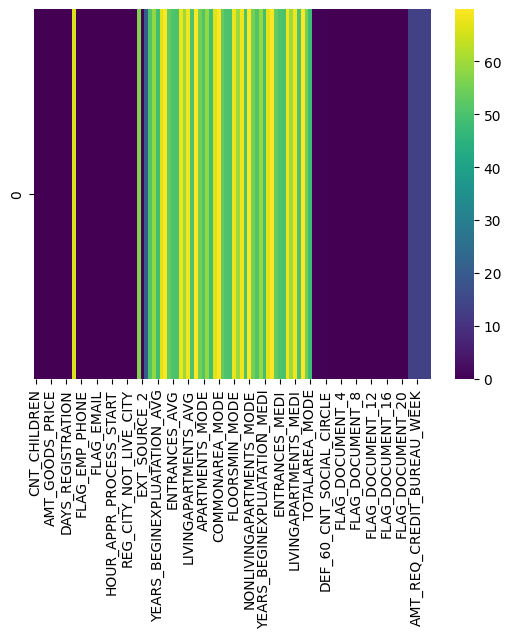

In [38]:
sb.heatmap(nullav1, annot = False, cmap = "viridis")

In [39]:
bureau_req_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR']

In [40]:
app_train['TOTAL_BUREAU_REQUESTS'] = app_train[bureau_req_cols].sum(axis=1)

In [41]:
app_train['TOTAL_BUREAU_REQUESTS'].isna().value_counts()

TOTAL_BUREAU_REQUESTS
False    307511
Name: count, dtype: int64

In [42]:
app_train = app_train.drop(columns=bureau_req_cols)

In [43]:
housing_cols = [col for col in app_train.columns 
                if col.endswith('_AVG') 
                or col.endswith('_MODE') 
                or col.endswith('_MEDI') 
                or col == 'TOTALAREA_MODE']

In [44]:
app_train = app_train.drop(columns=housing_cols)

In [45]:
app_train['EXT_SOURCE_3_missing'] = app_train['EXT_SOURCE_3'].isna().astype(int)


In [46]:
app_train['EXT_SOURCE_3'] = app_train['EXT_SOURCE_3'].fillna(app_train['EXT_SOURCE_3'].median())

In [47]:
na_Extsource = app_train['EXT_SOURCE_3'].isna().sum()

In [48]:
na_Extsource

np.int64(0)

In [49]:
app_train['EXT_SOURCE_1_missing'] = app_train['EXT_SOURCE_1'].isna().astype(int)

In [50]:
app_train['EXT_SOURCE_1'] = app_train['EXT_SOURCE_1'].fillna(app_train['EXT_SOURCE_1'].median())

In [51]:
app_train['EXT_SOURCE_2_missing'] = app_train['EXT_SOURCE_2'].isna().astype(int)

In [52]:
app_train['EXT_SOURCE_2'] = app_train['EXT_SOURCE_2'].fillna(app_train['EXT_SOURCE_2'].median())

In [53]:
CNT_SOCIAL_CIRCLE = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
app_train[CNT_SOCIAL_CIRCLE] = app_train[CNT_SOCIAL_CIRCLE].fillna(app_train[CNT_SOCIAL_CIRCLE].median())

In [54]:
app_train['CNT_FAM_MEMBERS'] = app_train['CNT_FAM_MEMBERS'].fillna(app_train['CNT_FAM_MEMBERS'].median())

In [55]:
app_train['OWN_CAR_AGE_missing'] = app_train['OWN_CAR_AGE'].isna().astype(int)

In [56]:
app_train['AMT_GOODS_PRICE'] = app_train['AMT_GOODS_PRICE'].fillna(app_train['AMT_GOODS_PRICE'].median())

In [57]:
app_train['AMT_ANNUITY'] = app_train['AMT_ANNUITY'].fillna(app_train['AMT_ANNUITY'].median())

In [58]:
social_cols = [
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE']

app_train[social_cols] = app_train[social_cols].fillna(app_train[social_cols].median())

In [59]:
f1 = []
for i in app_train.columns:
        if app_train[i].dtype in ['int32', 'int64','float64']:
             f1.append(i) 

In [60]:
app_int1 = app_train[f1]

In [61]:
for col in app_int1.columns:
    print(f"{col}: {app_train[col].isna().sum()}")

    

SK_ID_CURR: 0
TARGET: 0
CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_BIRTH: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
DAYS_ID_PUBLISH: 0
OWN_CAR_AGE: 202929
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_PHONE: 0
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
EXT_SOURCE_1: 0
EXT_SOURCE_2: 0
EXT_SOURCE_3: 0
OBS_30_CNT_SOCIAL_CIRCLE: 0
DEF_30_CNT_SOCIAL_CIRCLE: 0
OBS_60_CNT_SOCIAL_CIRCLE: 0
DEF_60_CNT_SOCIAL_CIRCLE: 0
DAYS_LAST_PHONE_CHANGE: 0
FLAG_DOCUMENT_2: 0
FLAG_DOCUMENT_3: 0
FLAG_DOCUMENT_4: 0
FLAG_DOCUMENT_5: 0
FLAG_DOCUMENT_6: 0
FLAG_DOCUMENT_7: 0
FLAG_DOCUMENT_8: 0
FLAG_DOCUMENT_9: 0
FLAG_DOCUMENT_10: 0
FLAG_DOCUMENT_11: 0
FLAG_DOCUMENT_12: 0
FLA

In [62]:
s1 = []
for i in app_train.columns:
    if app_train[i].dtype == "object":
       s1.append(i)
        
app_obj = app_train[s1]

In [63]:
app_obj.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [64]:
app_obj.head()


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [65]:
import matplotlib.pyplot as plt

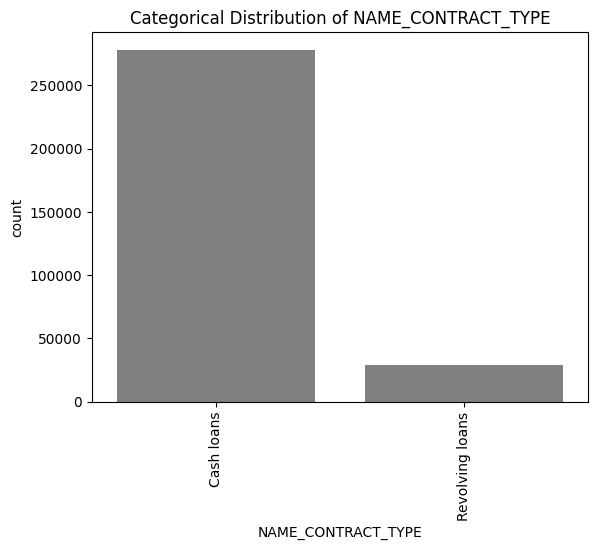

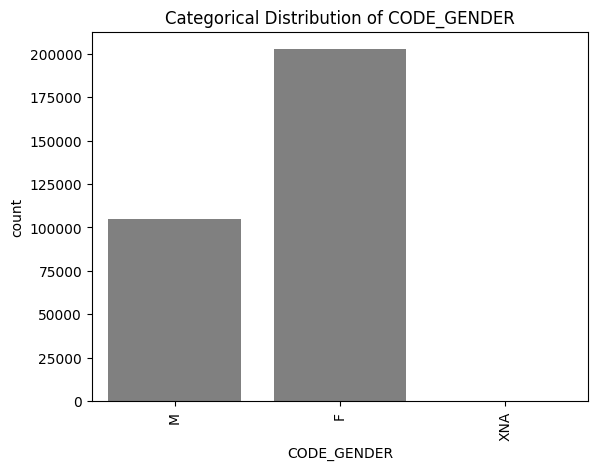

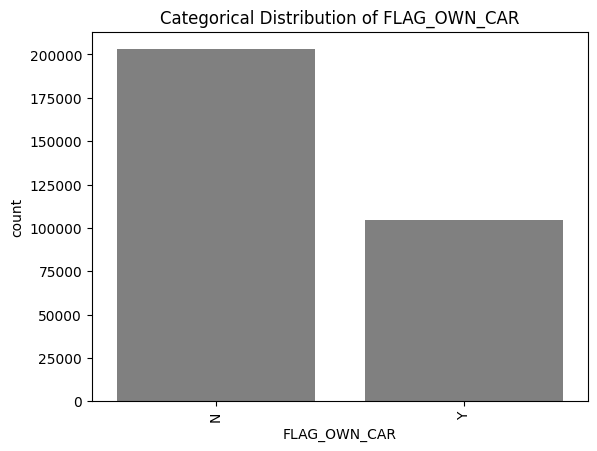

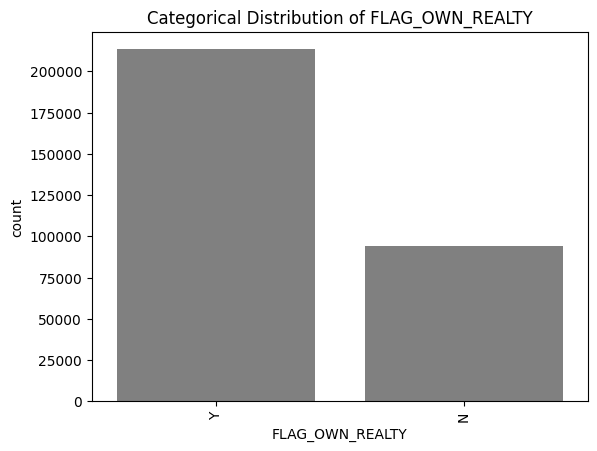

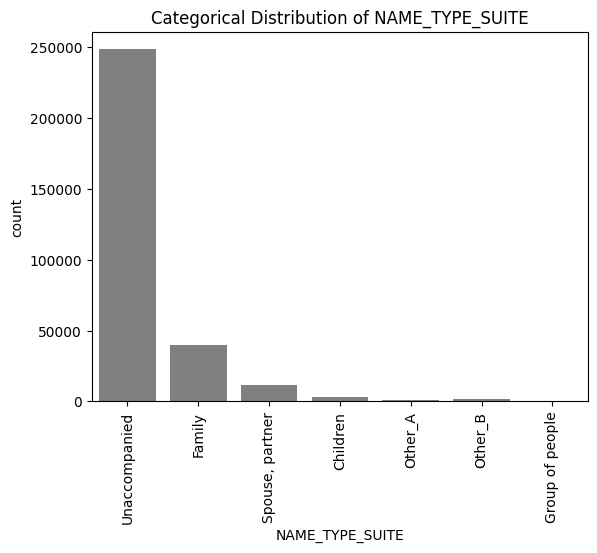

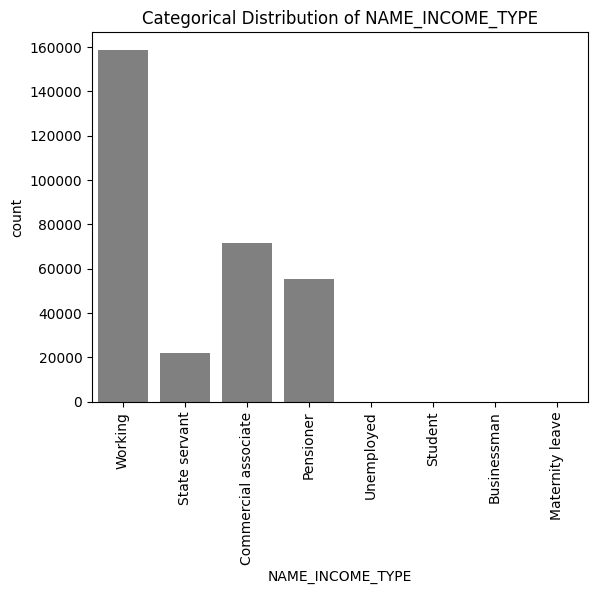

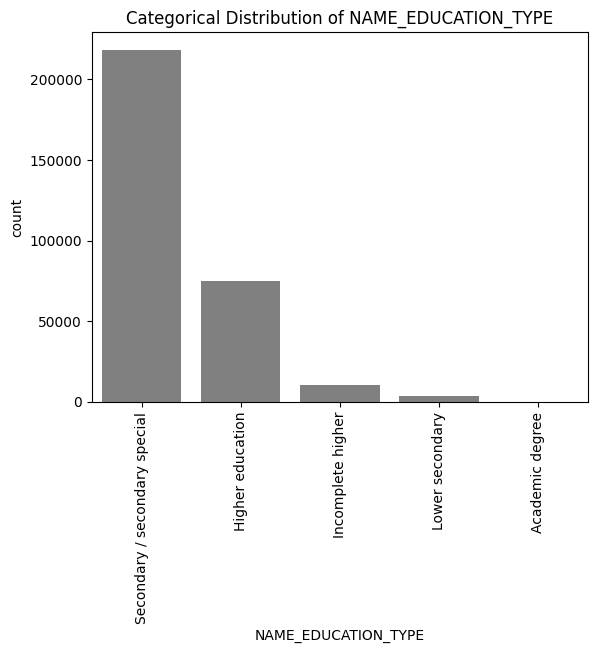

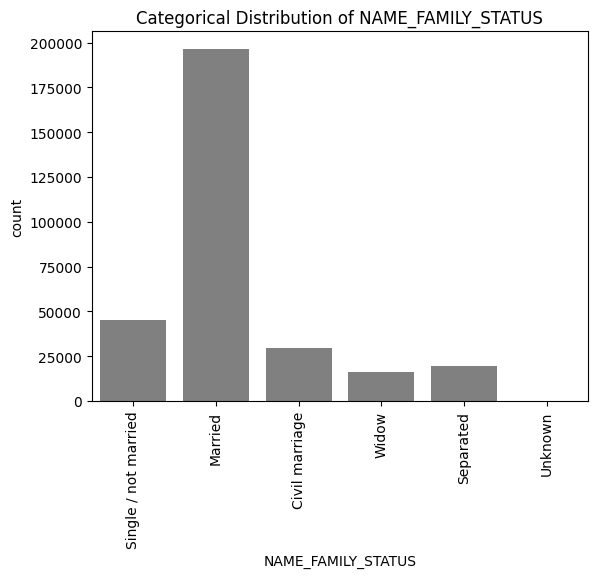

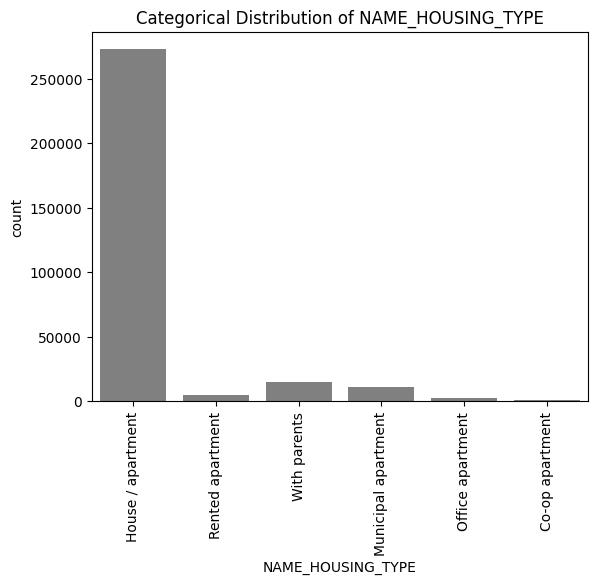

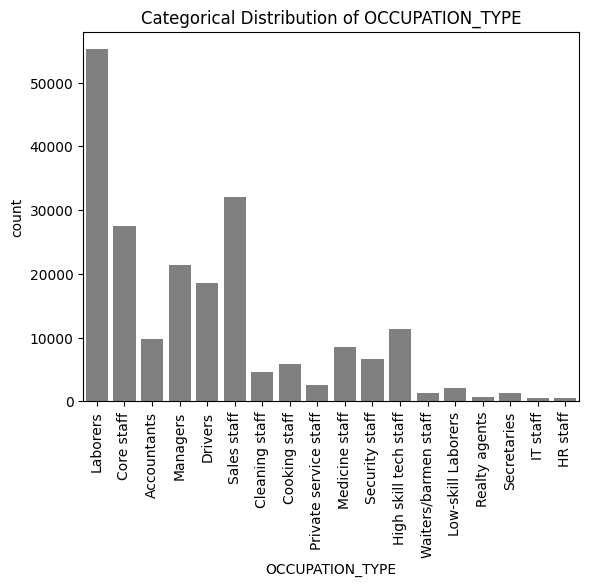

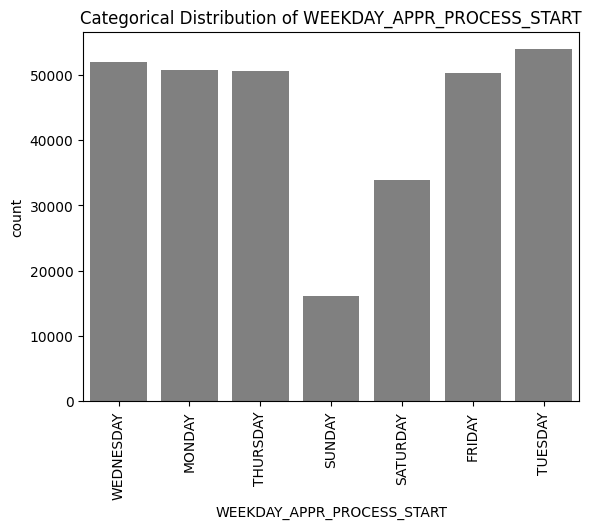

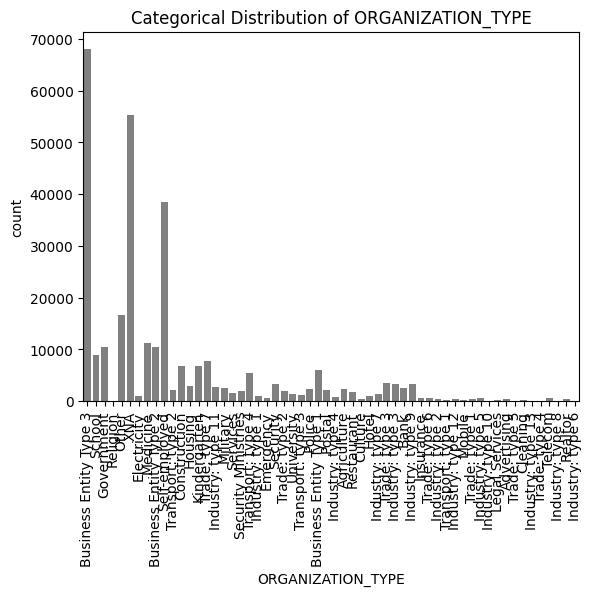

In [66]:
## From Categorical Features CashLoans, Feamles, with No carr, unaccompanied, 
# Working, Secondary Eduvcation, Married, living in Apartment, Labors, 
# Business Entity counts dominates in Data
for i in app_obj:
    sb.countplot(x = app_trpl[i], color = "grey")
    plt.title(f"Categorical Distribution of {i}")
    plt.xticks(rotation =90)
    plt.show()

In [67]:
app_obj["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [68]:
app_obj["NAME_EDUCATION_TYPE"].isna().sum()

np.int64(0)

In [69]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [70]:
edu_cols = ['NAME_EDUCATION_TYPE']

oe = OrdinalEncoder(categories=[['Lower secondary', 'Secondary / secondary special','Incomplete higher', 'Higher education','Academic degree']],handle_unknown='use_encoded_value',unknown_value=-1)

In [71]:
app_train[edu_cols] = oe.fit_transform(app_train[edu_cols])

In [72]:
app_train['NAME_EDUCATION_TYPE'].head()

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: NAME_EDUCATION_TYPE, dtype: float64

In [73]:
for i in app_obj.columns:
    print(f"The value counts of {i} columns are :")
    print(app_obj[i].value_counts())
    print("-"*60)

The value counts of NAME_CONTRACT_TYPE columns are :
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
------------------------------------------------------------
The value counts of CODE_GENDER columns are :
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
------------------------------------------------------------
The value counts of FLAG_OWN_CAR columns are :
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
------------------------------------------------------------
The value counts of FLAG_OWN_REALTY columns are :
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
------------------------------------------------------------
The value counts of NAME_TYPE_SUITE columns are :
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: 

In [74]:
binary_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

app_train[binary_cols] = app_train[binary_cols].replace({'Y': 1, 'N': 0}).astype('int64')

C:\Users\AKILAN M\AppData\Local\Temp\ipykernel_140472\2238261195.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  app_train[binary_cols] = app_train[binary_cols].replace({'Y': 1, 'N': 0}).astype('int64')


In [75]:
cat_cols = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE']

In [76]:
dummies = pd.get_dummies(app_train[cat_cols],drop_first=True)
app_train = app_train.drop(columns=cat_cols)


In [77]:
app_train = pd.concat([app_train, dummies], axis=1)

In [78]:
app_train.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,3.0,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [79]:
app_train["ORGANIZATION_TYPE_Trade: type 5"].value_counts()

ORGANIZATION_TYPE_Trade: type 5
False    307462
True         49
Name: count, dtype: int64

In [80]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 171 entries, SK_ID_CURR to ORGANIZATION_TYPE_XNA
dtypes: bool(106), float64(18), int64(47)
memory usage: 183.6 MB


In [81]:
Ntu = {}
for col in app_train.columns:
    d = app_train[col].isna().mean() * 100
    print(f"The average null values of Column {col} is {d:.2f}%")
    Ntu[col] = d

The average null values of Column SK_ID_CURR is 0.00%
The average null values of Column TARGET is 0.00%
The average null values of Column FLAG_OWN_CAR is 0.00%
The average null values of Column FLAG_OWN_REALTY is 0.00%
The average null values of Column CNT_CHILDREN is 0.00%
The average null values of Column AMT_INCOME_TOTAL is 0.00%
The average null values of Column AMT_CREDIT is 0.00%
The average null values of Column AMT_ANNUITY is 0.00%
The average null values of Column AMT_GOODS_PRICE is 0.00%
The average null values of Column NAME_EDUCATION_TYPE is 0.00%
The average null values of Column REGION_POPULATION_RELATIVE is 0.00%
The average null values of Column DAYS_BIRTH is 0.00%
The average null values of Column DAYS_EMPLOYED is 0.00%
The average null values of Column DAYS_REGISTRATION is 0.00%
The average null values of Column DAYS_ID_PUBLISH is 0.00%
The average null values of Column OWN_CAR_AGE is 65.99%
The average null values of Column FLAG_MOBIL is 0.00%
The average null values

In [82]:
zf = pd.DataFrame([Ntu])

Text(0.5, 1.0, 'Conformation HEAT MAP for Non null Features')

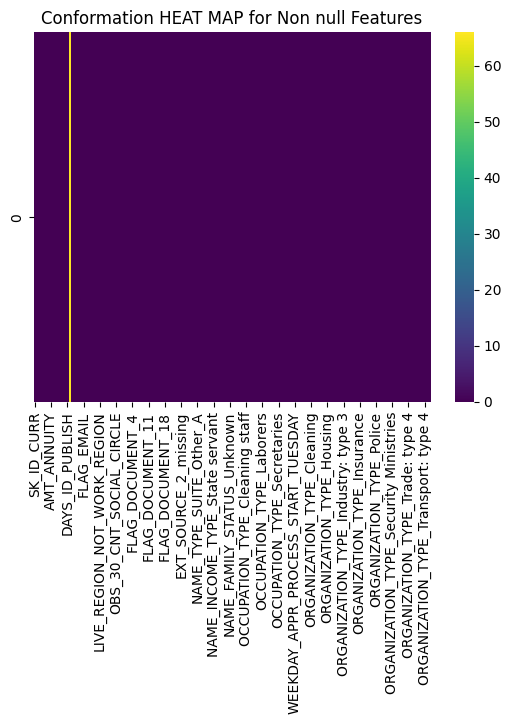

In [83]:
sb.heatmap(zf, annot = False, cmap = "viridis")
plt.title("Conformation HEAT MAP for Non null Features")

In [84]:
app_train["OWN_CAR_AGE"].isnull().sum()

np.int64(202929)

<Axes: xlabel='OWN_CAR_AGE', ylabel='Density'>

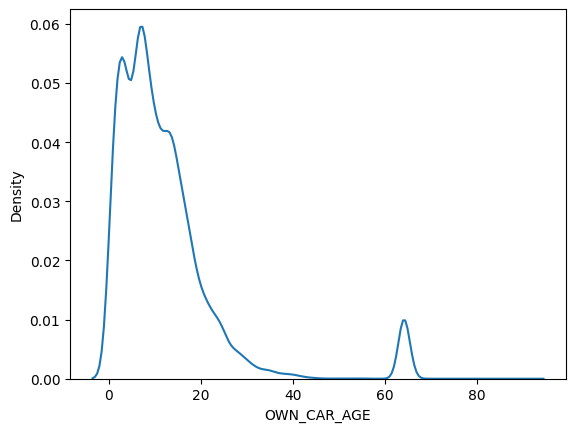

In [85]:
sb.kdeplot(app_train["OWN_CAR_AGE"],label= "OWN_CAR_AGE")

In [86]:
app_train["OWN_CAR_AGE"] = app_train["OWN_CAR_AGE"].fillna(0)

In [87]:
Notu = {}
for col in app_train.columns:
    d = app_train[col].isna().mean() * 100
    Ntu[col] = d

zf1 = pd.DataFrame([Notu])


In [88]:
corre = app_train.corr()["TARGET"]


Text(0.5, 1.0, 'The Correlation Plot Features Vs Target')

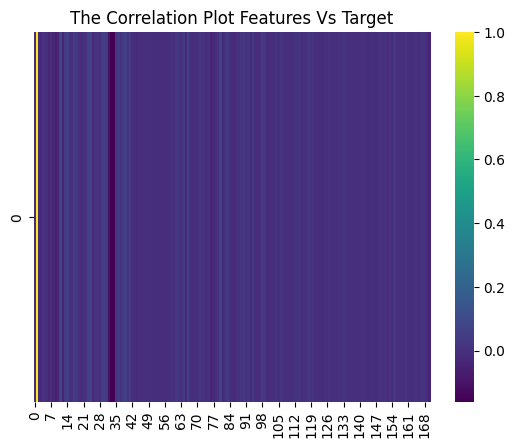

In [89]:
sb.heatmap([corre], cmap = "viridis")
plt.title("The Correlation Plot Features Vs Target")

In [90]:
import matplotlib.pyplot as plt

In [91]:
%matplotlib inline

In [92]:
num_cols = app_train.select_dtypes(include='number').columns

In [93]:
num_cols = [c for c in num_cols if app_train[c].nunique() > 10]


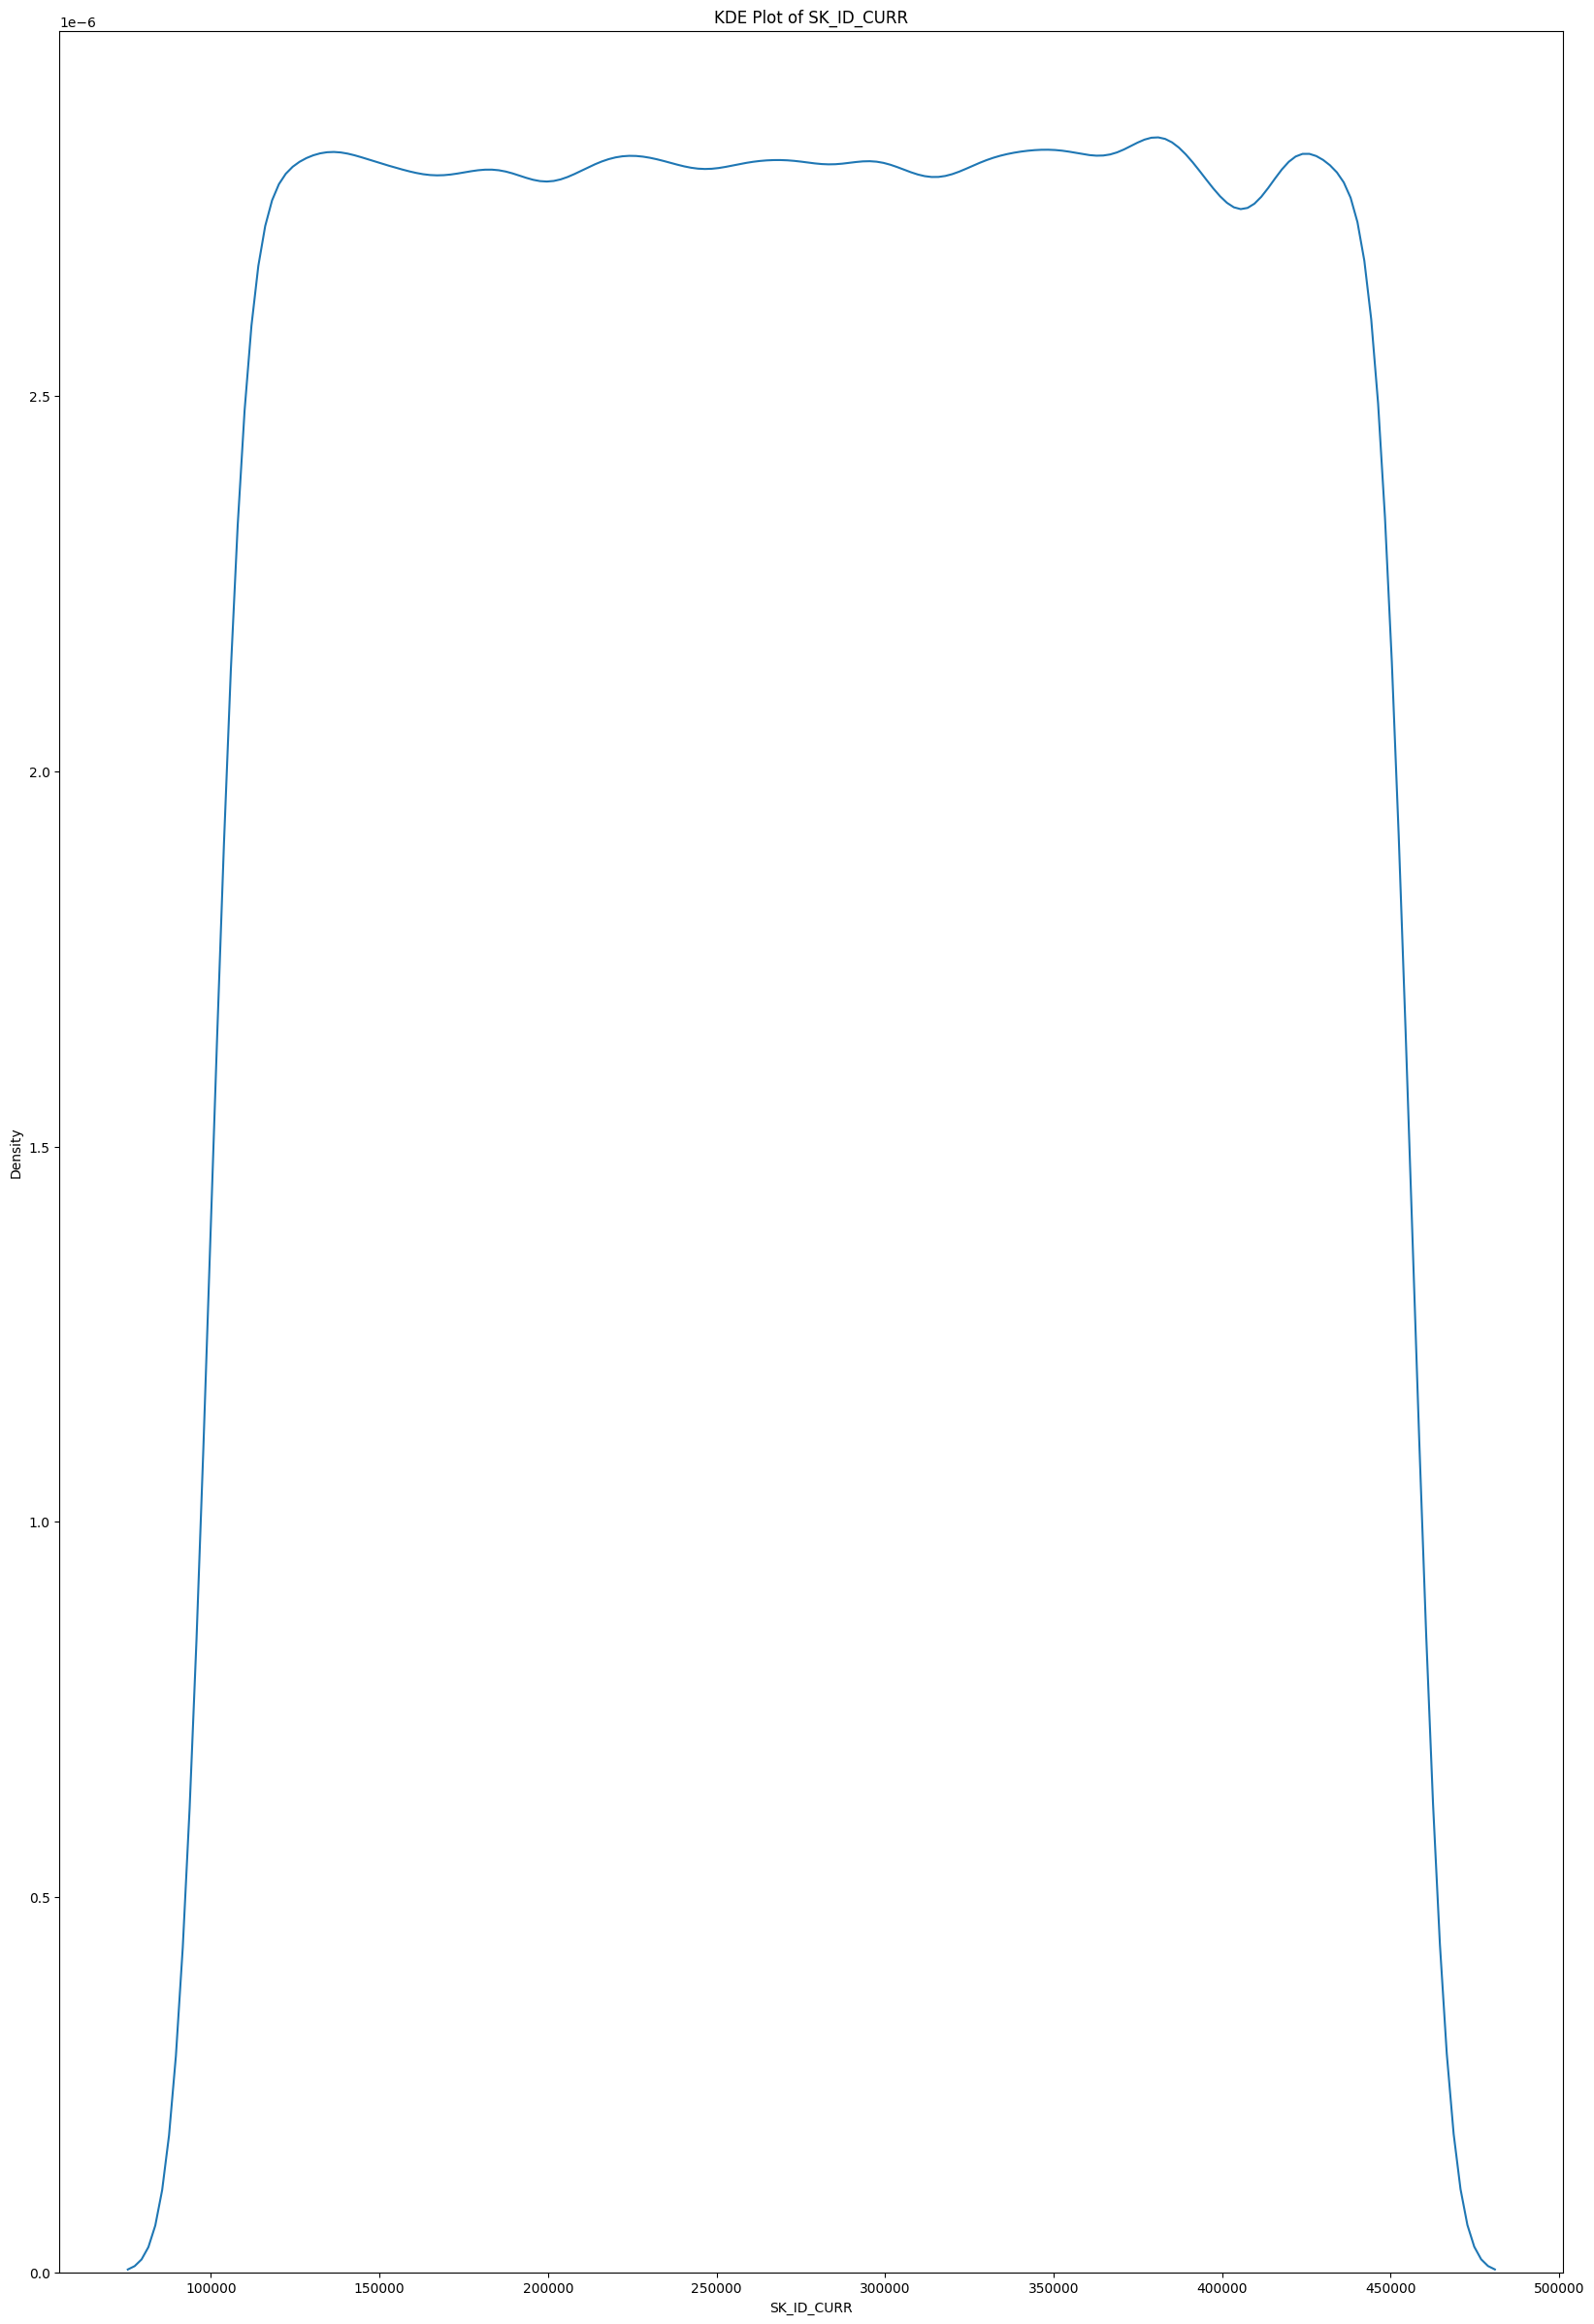

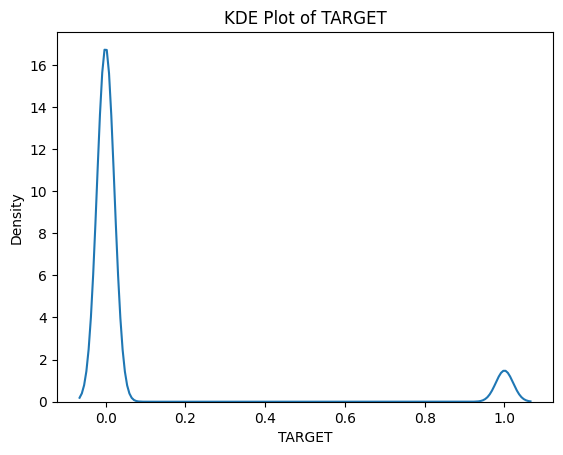

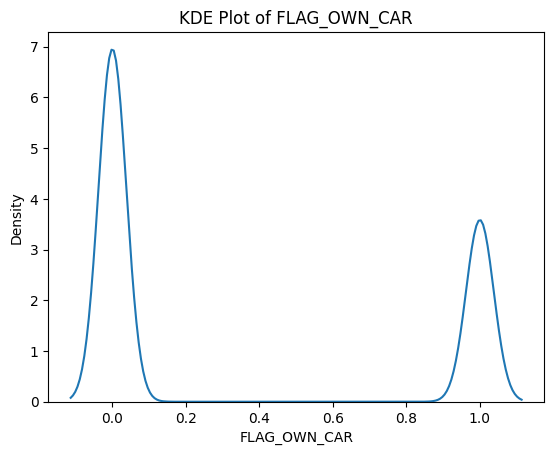

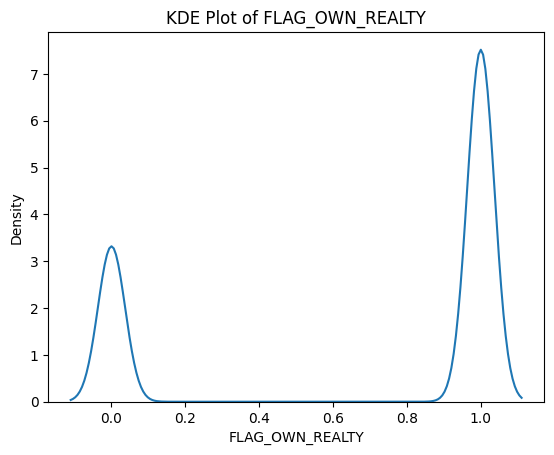

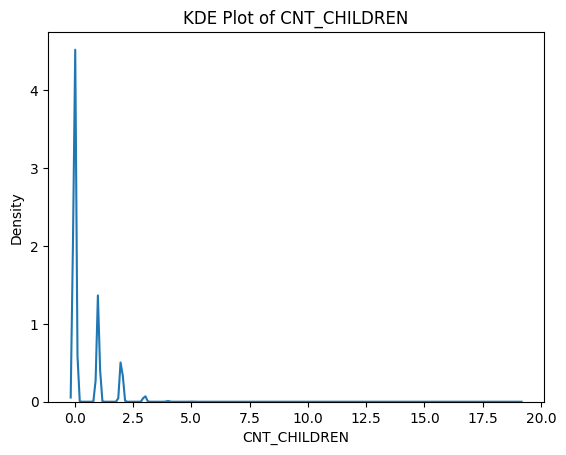

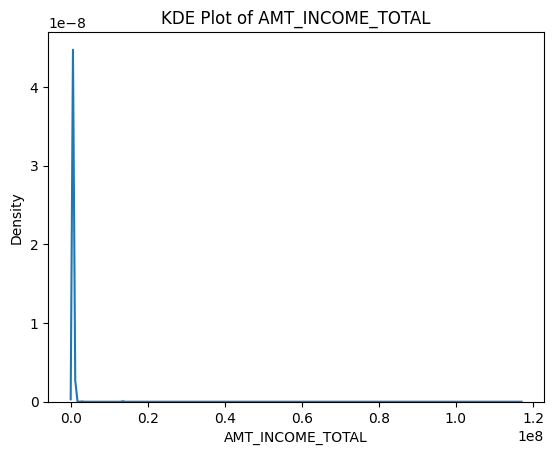

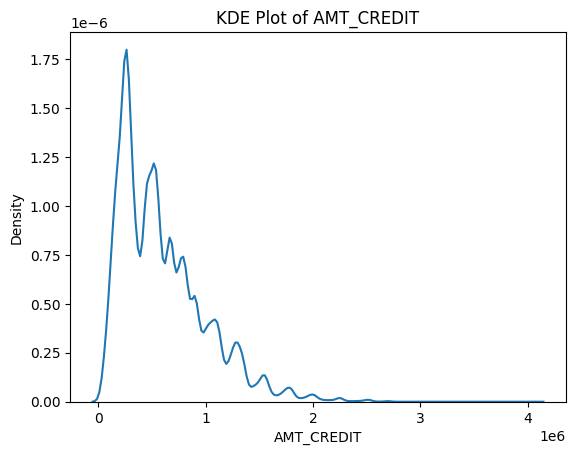

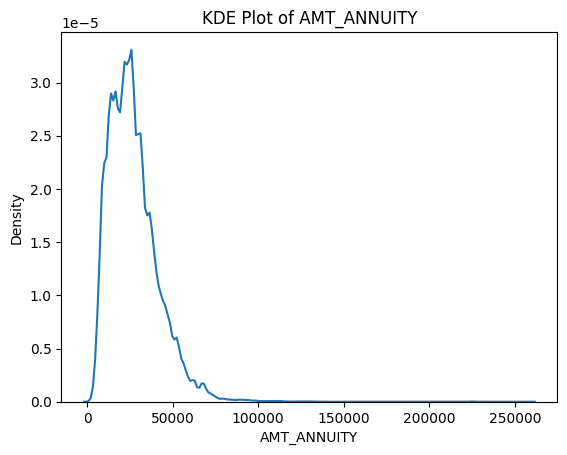

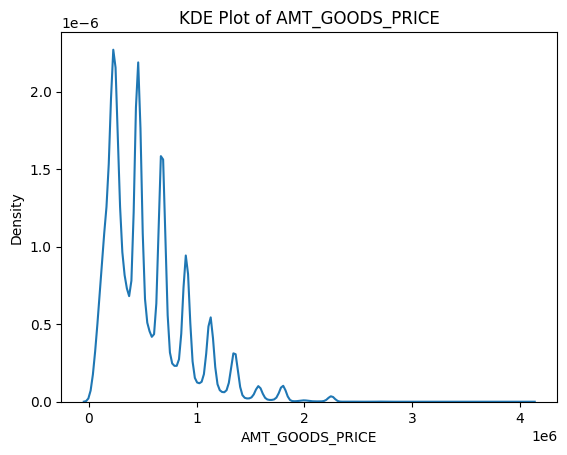

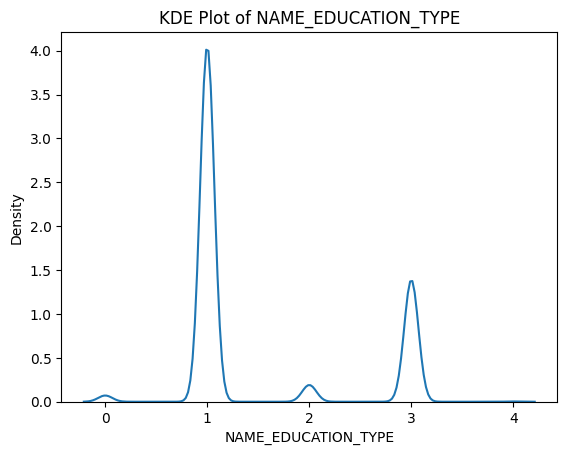

In [94]:
plt.figure(figsize = (20,30))
for i in app_train.columns[:10]:
      sb.kdeplot(app_train[i],label= i)
      plt.title(f"KDE Plot of {i}")
      plt.show()

In [95]:
for i in app_train.columns:
    print(f"The Minimum value of Feature {i} is {app_train[i].min()}")
    print(f"The Maximum value of Feature {i} is {app_train[i].max()}")
    print(f"The Mean value of Feature {i} is {app_train[i].mean()}")
    print("--"*40)

The Minimum value of Feature SK_ID_CURR is 100002
The Maximum value of Feature SK_ID_CURR is 456255
The Mean value of Feature SK_ID_CURR is 278180.51857657125
--------------------------------------------------------------------------------
The Minimum value of Feature TARGET is 0
The Maximum value of Feature TARGET is 1
The Mean value of Feature TARGET is 0.08072881945686496
--------------------------------------------------------------------------------
The Minimum value of Feature FLAG_OWN_CAR is 0
The Maximum value of Feature FLAG_OWN_CAR is 1
The Mean value of Feature FLAG_OWN_CAR is 0.34010815873253314
--------------------------------------------------------------------------------
The Minimum value of Feature FLAG_OWN_REALTY is 0
The Maximum value of Feature FLAG_OWN_REALTY is 1
The Mean value of Feature FLAG_OWN_REALTY is 0.6936727466659729
--------------------------------------------------------------------------------
The Minimum value of Feature CNT_CHILDREN is 0
The Maximum 

In [96]:
app_train['TARGET'].value_counts(normalize=True)


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Binary Class vs Count Plot')

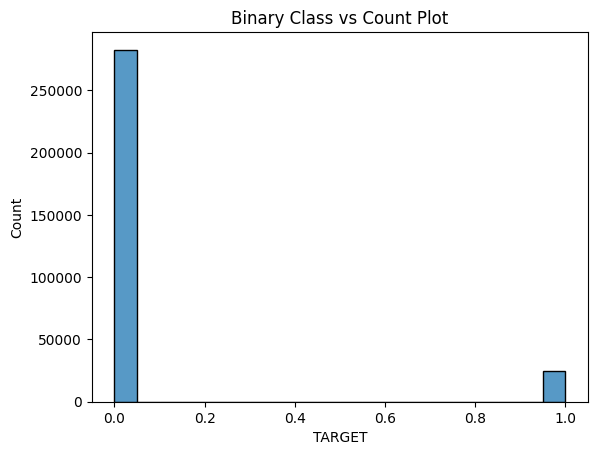

In [97]:
sb.histplot(app_train['TARGET'])
plt.title("Binary Class vs Count Plot")

In [98]:
app_train['TARGET'].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

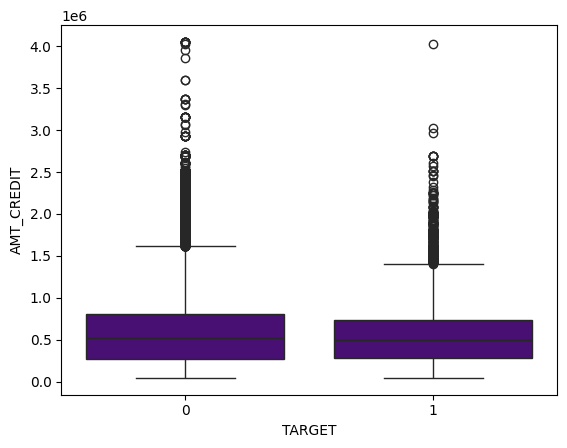

In [99]:
sb.boxplot(x='TARGET', y='AMT_CREDIT', data=app_train, color = "indigo")

C:\Users\AKILAN M\AppData\Local\Temp\ipykernel_140472\1194885018.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lightblue'` for the same effect.

  sb.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train, color = "lightblue", hue = "TARGET")


<Axes: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

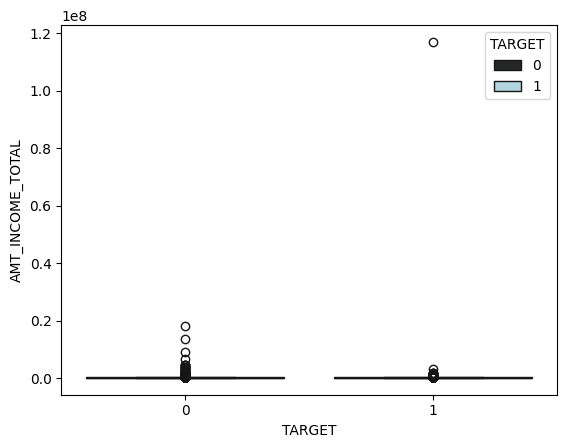

In [100]:
sb.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train, color = "lightblue", hue = "TARGET")

In [101]:
descr = app_train.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])


In [102]:
descr

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TOTAL_BUREAU_REQUESTS,EXT_SOURCE_3_missing,EXT_SOURCE_1_missing,EXT_SOURCE_2_missing,OWN_CAR_AGE_missing
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,1.509507,...,0.000267,0.008130,0.000595,0.000507,0.000335,2.145686,0.198253,0.563811,0.002146,0.659908
std,102790.175348,0.272419,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.874544,...,0.016327,0.089798,0.024387,0.022518,0.018299,2.290869,0.398684,0.495912,0.046278,0.473741
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,103590.200000,0.000000,0.000000,0.000000,0.000000,4.500000e+04,7.641000e+04,6183.000000,6.750000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,117945.500000,0.000000,0.000000,0.000000,0.000000,6.750000e+04,1.350000e+05,9000.000000,1.350000e+05,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000
95%,438427.500000,1.000000,1.000000,1.000000,2.000000,3.375000e+05,1.350000e+06,53325.000000,1.305000e+06,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,1.000000


In [103]:
app_train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [104]:
app_train['AGE_YEARS'] = (-app_train['DAYS_BIRTH']) / 365
app_train = app_train.drop(columns=['DAYS_BIRTH'])

In [105]:
app_train['AGE_YEARS'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE_YEARS, dtype: float64

Text(0.5, 1.0, 'Age vs Count')

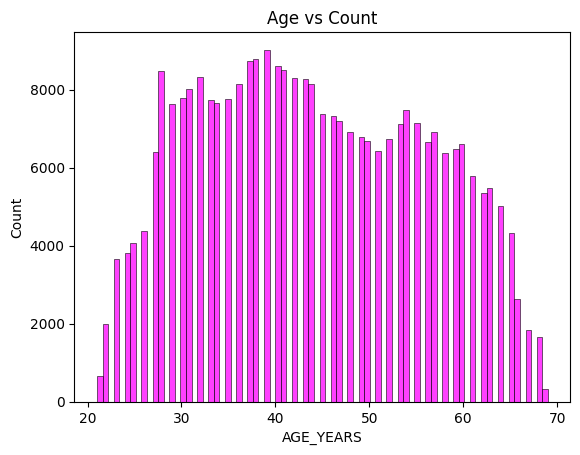

In [106]:
Agehist = sb.histplot(app_train['AGE_YEARS'].round(),color = "magenta")
plt.title("Age vs Count")

In [107]:
bureau = pd.read_csv("bureau.csv")

In [108]:
bur = pd.read_csv("bureau.csv")

In [109]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [110]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [111]:
bureau.describe().applymap(lambda x: f"{x:,.2f}")

C:\Users\AKILAN M\AppData\Local\Temp\ipykernel_140472\906737624.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bureau.describe().applymap(lambda x: f"{x:,.2f}")


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,"1,716,428.00","1,716,428.00","1,716,428.00","1,716,428.00","1,610,875.00","1,082,775.00","591,940.00","1,716,428.00","1,716,415.00","1,458,759.00","1,124,648.00","1,716,428.00","1,716,428.00","489,637.00"
mean,"278,214.93","5,924,434.49","-1,142.11",0.82,510.52,"-1,017.44","3,825.42",0.01,"354,994.59","137,085.12","6,229.51",37.91,-593.75,"15,712.76"
std,"102,938.56","532,265.73",795.16,36.54,"4,994.22",714.01,"206,031.61",0.10,"1,149,811.34","677,401.13","45,032.03","5,937.65",720.75,"325,826.95"
min,"100,001.00","5,000,000.00","-2,922.00",0.00,"-42,060.00","-42,023.00",0.00,0.00,0.00,"-4,705,600.32","-586,406.11",0.00,"-41,947.00",0.00
25%,"188,866.75","5,463,953.75","-1,666.00",0.00,"-1,138.00","-1,489.00",0.00,0.00,"51,300.00",0.00,0.00,0.00,-908.00,0.00
50%,"278,055.00","5,926,303.50",-987.00,0.00,-330.00,-897.00,0.00,0.00,"125,518.50",0.00,0.00,0.00,-395.00,0.00
75%,"367,426.00","6,385,681.25",-474.00,0.00,474.00,-425.00,0.00,0.00,"315,000.00","40,153.50",0.00,0.00,-33.00,"13,500.00"
max,"456,255.00","6,843,457.00",0.00,"2,792.00","31,199.00",0.00,"115,987,185.00",9.00,"585,000,000.00","170,100,000.00","4,705,600.32","3,756,681.00",372.00,"118,453,423.50"


In [112]:
for i in bureau.columns:
     print(i)

SK_ID_CURR
SK_ID_BUREAU
CREDIT_ACTIVE
CREDIT_CURRENCY
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE
CNT_CREDIT_PROLONG
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
CREDIT_TYPE
DAYS_CREDIT_UPDATE
AMT_ANNUITY


In [113]:
bureau_bal = pd.read_csv("bureau_balance.csv")

In [114]:
bureau_bal.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [115]:
bureau_bal["MONTHS_BALANCE"]

0            0
1           -1
2           -2
3           -3
4           -4
            ..
27299920   -47
27299921   -48
27299922   -49
27299923   -50
27299924   -51
Name: MONTHS_BALANCE, Length: 27299925, dtype: int64

<Axes: xlabel='STATUS', ylabel='count'>

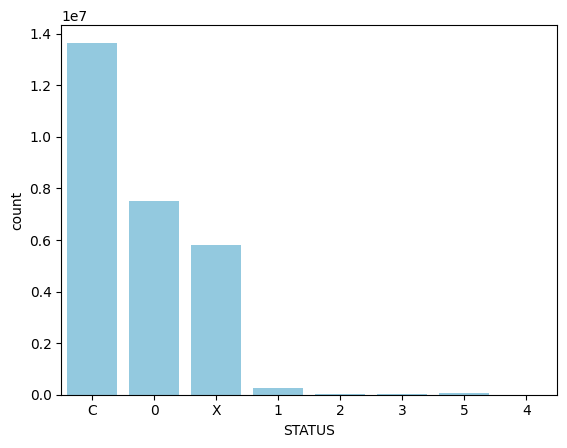

In [116]:
sb.countplot(x = bureau_bal["STATUS"] ,color ="skyblue") 


In [117]:
status_map = {'X': -1,'C': 0,'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5}

bureau_bal['STATUS'] = bureau_bal['STATUS'].map(status_map)

In [118]:
bb_agg1 = bureau_bal.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE': ['min', 'max', 'size'],'STATUS': ['mean', 'max']})
bb_agg1.columns = ['BB_MONTHS_MIN', 'BB_MONTHS_MAX', 'BB_MONTHS_COUNT','BB_STATUS_MEAN','BB_STATUS_MAX']

In [119]:
bb_agg1  = bb_agg1.reset_index()

In [120]:
bb_agg1

,SK_ID_BUREAU,BB_MONTHS_MIN,BB_MONTHS_MAX,BB_MONTHS_COUNT,BB_STATUS_MEAN,BB_STATUS_MAX
0,5001709,-96,0,97,-0.113402,0
1,5001710,-82,0,83,-0.361446,0
2,5001711,-3,0,4,-0.250000,0
3,5001712,-18,0,19,0.000000,0
4,5001713,-21,0,22,-1.000000,-1
...,...,...,...,...,...,...
817390,6842884,-47,0,48,-0.395833,0
817391,6842885,-23,0,24,2.500000,5
817392,6842886,-32,0,33,0.000000,0
817393,6842887,-36,0,37,0.000000,0


In [121]:
bureau = bureau.merge(bb_agg1, on='SK_ID_BUREAU', how='left')

In [122]:
bureau["BB_MONTHS_COUNT"].unique()

array([nan, 27., 12., 26., 33., 38., 39.,  8., 25., 21.,  4., 16., 77.,
       22., 31., 30., 18., 55.,  9., 23., 24., 79., 19., 10., 11.,  5.,
       13.,  3., 17., 50.,  6., 40., 49., 15., 45., 53., 52., 20., 81.,
        2., 43., 63., 71., 29., 76., 42., 41., 34.,  7., 51., 28., 82.,
       68., 36., 46., 56., 35., 44., 54., 47., 14.,  1., 61., 67., 57.,
       73., 85., 32., 60., 37., 93., 92., 84., 75., 62., 80., 94., 58.,
       96., 59., 64., 66., 90., 83., 72., 48., 95., 65., 86., 87., 70.,
       91., 88., 78., 69., 89., 74., 97.])

In [123]:
f1 = []
ob = []
for i in bureau.columns:
        if bureau[i].dtype in ['int32', 'int64','float64']:
             f1.append(i) 
        else:
             ob.append(i)

In [124]:
f1

['SK_ID_CURR',
 'SK_ID_BUREAU',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY',
 'BB_MONTHS_MIN',
 'BB_MONTHS_MAX',
 'BB_MONTHS_COUNT',
 'BB_STATUS_MEAN',
 'BB_STATUS_MAX']

In [125]:
ob

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

In [126]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['sum', 'mean'],
    'CREDIT_DAY_OVERDUE': 'max',
    'BB_MONTHS_COUNT': 'sum'})

bureau_agg.columns = ['_'.join(col) for col in bureau_agg.columns]
bureau_agg.reset_index(inplace=True)


In [127]:
bureau_agg

,SK_ID_CURR,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,CREDIT_DAY_OVERDUE_max,BB_MONTHS_COUNT_sum
0,100001,1453365.000,2.076236e+05,0,172.0
1,100002,865055.565,1.081319e+05,0,110.0
2,100003,1017400.500,2.543501e+05,0,0.0
3,100004,189037.800,9.451890e+04,0,0.0
4,100005,657126.000,2.190420e+05,0,21.0
...,...,...,...,...,...
305806,456249,3693858.660,2.841430e+05,0,0.0
305807,456250,3086459.550,1.028820e+06,0,87.0
305808,456253,3960000.000,9.900000e+05,0,117.0
305809,456254,45000.000,4.500000e+04,0,37.0


In [128]:
cols_to_drop = [
    'AMT_CREDIT_SUM',
    'CREDIT_DAY_OVERDUE',
    'BB_MONTHS_COUNT']

bureau.drop(columns=cols_to_drop, inplace=True)


In [129]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   AMT_CREDIT_MAX_OVERDUE  float64
 8   CNT_CREDIT_PROLONG      int64  
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_LIMIT    float64
 11  AMT_CREDIT_SUM_OVERDUE  float64
 12  CREDIT_TYPE             object 
 13  DAYS_CREDIT_UPDATE      int64  
 14  AMT_ANNUITY             float64
 15  BB_MONTHS_MIN           float64
 16  BB_MONTHS_MAX           float64
 17  BB_STATUS_MEAN          float64
 18  BB_STATUS_MAX           float64
dtypes: float64(11), int64(5), object(3)
memory usage: 248.8+ MB


In [130]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   AMT_CREDIT_MAX_OVERDUE  float64
 8   CNT_CREDIT_PROLONG      int64  
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_LIMIT    float64
 11  AMT_CREDIT_SUM_OVERDUE  float64
 12  CREDIT_TYPE             object 
 13  DAYS_CREDIT_UPDATE      int64  
 14  AMT_ANNUITY             float64
 15  BB_MONTHS_MIN           float64
 16  BB_MONTHS_MAX           float64
 17  BB_STATUS_MEAN          float64
 18  BB_STATUS_MAX           float64
dtypes: float64(11), int64(5), object(3)
memory usage: 248.8+ MB


In [131]:
cr_bal = pd.read_csv("credit_card_balance.csv")

In [132]:
pov = pd.read_csv("POS_CASH_balance.csv")

In [133]:
prev = pd.read_csv("previous_application.csv")

In [134]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [135]:
prev_agg = prev.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max'],
    'AMT_CREDIT': ['mean'],
    'DAYS_DECISION': 'mean',
    'NAME_CONTRACT_STATUS': 'nunique'})
prev_agg.columns = ['_'.join(col) for col in prev_agg.columns]
prev_agg.reset_index(inplace=True)


In [136]:
pov_agg = pov.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['max', 'size'],
    'SK_DPD': 'mean',
    'SK_DPD_DEF': 'mean'})
pov_agg.columns = ['_'.join(col) for col in pov_agg.columns]
pov_agg.reset_index(inplace=True)


In [137]:
cr_agg = cr_bal.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': ['mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean',
    'SK_DPD': 'mean'})
cr_agg.columns = ['_'.join(col) for col in cr_agg.columns]
cr_agg.reset_index(inplace=True)


In [138]:
prev_agg.head()

,SK_ID_CURR,AMT_APPLICATION_mean,AMT_APPLICATION_max,AMT_CREDIT_mean,DAYS_DECISION_mean,NAME_CONTRACT_STATUS_nunique
0,100001,24835.50,24835.5,23787.00,-1740.0,1
1,100002,179055.00,179055.0,179055.00,-606.0,1
2,100003,435436.50,900000.0,484191.00,-1305.0,1
3,100004,24282.00,24282.0,20106.00,-815.0,1
4,100005,22308.75,44617.5,20076.75,-536.0,2


In [139]:
pov_agg.head()

,SK_ID_CURR,MONTHS_BALANCE_max,MONTHS_BALANCE_size,SK_DPD_mean,SK_DPD_DEF_mean
0,100001,-53,9,0.777778,0.777778
1,100002,-1,19,0.000000,0.000000
2,100003,-18,28,0.000000,0.000000
3,100004,-24,4,0.000000,0.000000
4,100005,-15,11,0.000000,0.000000


In [140]:
cr_agg.head()

,SK_ID_CURR,AMT_BALANCE_mean,AMT_BALANCE_max,AMT_CREDIT_LIMIT_ACTUAL_mean,SK_DPD_mean
0,100006,0.000000,0.00,270000.000000,0.000000
1,100011,54482.111149,189000.00,164189.189189,0.000000
2,100013,18159.919219,161420.22,131718.750000,0.010417
3,100021,0.000000,0.00,675000.000000,0.000000
4,100023,0.000000,0.00,135000.000000,0.000000


In [141]:
final_df = app_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
final_df = final_df.merge(prev_agg, on='SK_ID_CURR', how='left')
final_df = final_df.merge(pov_agg, on='SK_ID_CURR', how='left')
final_df = final_df.merge(cr_agg, on='SK_ID_CURR', how='left')


In [142]:
final_df.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,DAYS_DECISION_mean,NAME_CONTRACT_STATUS_nunique,MONTHS_BALANCE_max,MONTHS_BALANCE_size,SK_DPD_mean_x,SK_DPD_DEF_mean,AMT_BALANCE_mean,AMT_BALANCE_max,AMT_CREDIT_LIMIT_ACTUAL_mean,SK_DPD_mean_y
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1.0,...,-606.000000,1.0,-1.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,3.0,...,-1305.000000,1.0,-18.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN
2,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,1.0,...,-815.000000,1.0,-24.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1.0,...,-272.444444,3.0,-1.0,21.0,0.0,0.0,0.0,0.0,270000.0,0.0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,1.0,...,-1222.833333,1.0,-1.0,66.0,0.0,0.0,NaN,NaN,NaN,NaN


In [143]:
final_df.shape

(307511, 188)

In [144]:
final_df['SK_ID_CURR'].nunique() == final_df.shape[0]


True

In [145]:
final_df.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,DAYS_DECISION_mean,NAME_CONTRACT_STATUS_nunique,MONTHS_BALANCE_max,MONTHS_BALANCE_size,SK_DPD_mean_x,SK_DPD_DEF_mean,AMT_BALANCE_mean,AMT_BALANCE_max,AMT_CREDIT_LIMIT_ACTUAL_mean,SK_DPD_mean_y
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1.0,...,-606.000000,1.0,-1.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,3.0,...,-1305.000000,1.0,-18.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN
2,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,1.0,...,-815.000000,1.0,-24.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1.0,...,-272.444444,3.0,-1.0,21.0,0.0,0.0,0.0,0.0,270000.0,0.0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,1.0,...,-1222.833333,1.0,-1.0,66.0,0.0,0.0,NaN,NaN,NaN,NaN


In [146]:
bureau[ob].head()

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Consumer credit
1,Active,currency 1,Credit card
2,Active,currency 1,Consumer credit
3,Active,currency 1,Credit card
4,Active,currency 1,Consumer credit


In [147]:
def zerch(x):
    Nav = {}
    for col in x.columns:
        d = x[col].isna().mean() * 100
        Nav[col] = d
    return Nav


In [148]:
zerbu = zerch(final_df)

In [149]:
zerbu

{'SK_ID_CURR': np.float64(0.0),
 'TARGET': np.float64(0.0),
 'FLAG_OWN_CAR': np.float64(0.0),
 'FLAG_OWN_REALTY': np.float64(0.0),
 'CNT_CHILDREN': np.float64(0.0),
 'AMT_INCOME_TOTAL': np.float64(0.0),
 'AMT_CREDIT': np.float64(0.0),
 'AMT_ANNUITY': np.float64(0.0),
 'AMT_GOODS_PRICE': np.float64(0.0),
 'NAME_EDUCATION_TYPE': np.float64(0.0),
 'REGION_POPULATION_RELATIVE': np.float64(0.0),
 'DAYS_EMPLOYED': np.float64(0.0),
 'DAYS_REGISTRATION': np.float64(0.0),
 'DAYS_ID_PUBLISH': np.float64(0.0),
 'OWN_CAR_AGE': np.float64(0.0),
 'FLAG_MOBIL': np.float64(0.0),
 'FLAG_EMP_PHONE': np.float64(0.0),
 'FLAG_WORK_PHONE': np.float64(0.0),
 'FLAG_CONT_MOBILE': np.float64(0.0),
 'FLAG_PHONE': np.float64(0.0),
 'FLAG_EMAIL': np.float64(0.0),
 'CNT_FAM_MEMBERS': np.float64(0.0),
 'REGION_RATING_CLIENT': np.float64(0.0),
 'REGION_RATING_CLIENT_W_CITY': np.float64(0.0),
 'HOUR_APPR_PROCESS_START': np.float64(0.0),
 'REG_REGION_NOT_LIVE_REGION': np.float64(0.0),
 'REG_REGION_NOT_WORK_REGION': np.

In [150]:
def nona(itv):
    naneed = []
    for col, val in itv.items():
         if val > 0:
              naneed.append(col)
    return naneed

In [151]:
burna = nona(zerbu)

In [152]:
burna

['AMT_CREDIT_SUM_sum',
 'AMT_CREDIT_SUM_mean',
 'CREDIT_DAY_OVERDUE_max',
 'BB_MONTHS_COUNT_sum',
 'AMT_APPLICATION_mean',
 'AMT_APPLICATION_max',
 'AMT_CREDIT_mean',
 'DAYS_DECISION_mean',
 'NAME_CONTRACT_STATUS_nunique',
 'MONTHS_BALANCE_max',
 'MONTHS_BALANCE_size',
 'SK_DPD_mean_x',
 'SK_DPD_DEF_mean',
 'AMT_BALANCE_mean',
 'AMT_BALANCE_max',
 'AMT_CREDIT_LIMIT_ACTUAL_mean',
 'SK_DPD_mean_y']

In [153]:
final_df[burna] = final_df[burna].fillna(0)

In [154]:
halfcl_df = final_df

In [155]:
final_df.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,DAYS_DECISION_mean,NAME_CONTRACT_STATUS_nunique,MONTHS_BALANCE_max,MONTHS_BALANCE_size,SK_DPD_mean_x,SK_DPD_DEF_mean,AMT_BALANCE_mean,AMT_BALANCE_max,AMT_CREDIT_LIMIT_ACTUAL_mean,SK_DPD_mean_y
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000
mean,278180.518577,0.080729,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,1.509507,...,-870.370476,1.691380,-11.822738,27.782339,4.147601,0.202240,20195.131074,4.083719e+04,5.885606e+04,1.189522
std,102790.175348,0.272419,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.874544,...,598.980486,0.878782,18.345695,24.580154,58.596698,12.540932,66305.511028,1.125735e+05,1.384211e+05,23.786480
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,...,-2922.000000,0.000000,-96.000000,0.000000,0.000000,0.000000,-2930.232558,0.000000e+00,0.000000e+00,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,1.000000,...,-1213.333333,1.000000,-14.000000,11.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,278202.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,1.000000,...,-748.888889,2.000000,-3.000000,21.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,2.000000,...,-418.000000,2.000000,-1.000000,38.000000,0.000000,0.000000,0.000000,0.000000e+00,4.500000e+04,0.000000
max,456255.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,4.000000,...,0.000000,4.000000,0.000000,295.000000,2622.078431,1740.554455,928686.323571,1.354829e+06,1.350000e+06,1386.947917


In [156]:
final_df["TARGET"].dtype

dtype('int64')

In [157]:
ob

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

In [158]:
bt = []
for i in final_df.columns:
    if final_df[i].dtype == "bool":
           h = i
           bt.append(h)

In [159]:
len(bureau), len(final_df)

(1716428, 307511)

In [160]:
for col in ob:
    print(col)
    print(bureau[col].unique())
    print('-' * 60)


CREDIT_ACTIVE
['Closed' 'Active' 'Sold' 'Bad debt']
------------------------------------------------------------
CREDIT_CURRENCY
['currency 1' 'currency 2' 'currency 4' 'currency 3']
------------------------------------------------------------
CREDIT_TYPE
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
------------------------------------------------------------


In [161]:
## Credit Card Status Encoding
credit_active_map = {'Active': 2,'Closed': 1,'Bad debt': 0,'Sold': 0}


In [162]:
bureau["CREDIT_ACTIVE_ENC"] = (bureau['CREDIT_ACTIVE'].map(credit_active_map).astype('Int64'))

In [163]:
bureau["CREDIT_ACTIVE_ENC"].shape

(1716428,)

In [164]:
bureau_agg = bureau.groupby('SK_ID_CURR', as_index=False).agg(
    CREDIT_ACTIVE_ENC_SUM=('CREDIT_ACTIVE_ENC', 'sum'),
    CREDIT_ACTIVE_ENC_MEAN=('CREDIT_ACTIVE_ENC', 'mean'),
    CREDIT_ACTIVE_ENC_COUNT=('CREDIT_ACTIVE_ENC', 'count'))


In [165]:
bureau_agg.shape

(305811, 4)

In [166]:
final_df = app_train.merge(bureau_agg,on='SK_ID_CURR',how='left')

In [167]:
bureau1 = bureau.copy()


In [168]:
risky_types = [
    'Microloan',
    'Loan for working capital replenishment',
    'Loan for business development']

bureau['IS_RISKY_LOAN'] = bureau['CREDIT_TYPE'].isin(risky_types).astype(int)
bureau['HAS_MORTGAGE'] = (bureau['CREDIT_TYPE'] == 'Mortgage').astype(int)
bureau['HAS_CREDIT_CARD'] = (bureau['CREDIT_TYPE'] == 'Credit card').astype(int)


In [169]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg(
    CREDIT_TYPE_COUNT=('CREDIT_TYPE', 'count'),
    RISKY_LOAN_SUM=('IS_RISKY_LOAN', 'sum'),
    HAS_MORTGAGE=('HAS_MORTGAGE', 'max'),
    HAS_CREDIT_CARD=('HAS_CREDIT_CARD', 'max')).reset_index()


In [170]:
bureau_agg.shape

(305811, 5)

In [171]:
final_df = final_df.merge(bureau_agg,on='SK_ID_CURR',how='left')


In [172]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
fprev = []
oprev = []
for i in prev.columns:
        if prev[i].dtype in ['int32', 'int64','float64']:
             fprev.append(i) 
        else:
             oprev.append(i)

In [174]:
oprev

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [175]:
for col in oprev:
    print(col)
    print(prev[col].unique())
    print('-' * 60)

NAME_CONTRACT_TYPE
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
------------------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT
['Y' 'N']
------------------------------------------------------------
NAME_CASH_LOAN_PURPOSE
['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
------------------------------------------------------------
NAME_CONTRACT_STATUS
['Approved' 'Refused' 'Cance

In [176]:
prev = prev.copy()


In [177]:
drop_cols = [
    'CODE_REJECT_REASON',
    'NAME_TYPE_SUITE',
    'CHANNEL_TYPE',
    'NAME_SELLER_INDUSTRY']

prev.drop(columns=drop_cols, inplace=True)

In [178]:
cat_cols = [
    'NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START',
    'FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE',
    'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
    'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION']




In [179]:
for col in cat_cols:
    if col in prev.columns:
        prev[col] = prev[col].fillna('Unknown')
        prev[col] = prev[col].replace(['XNA', 'XAP'], 'Unknown')


In [180]:
final_df.shape

(307511, 178)

In [181]:
ids = final_df[['SK_ID_CURR']].copy()
ids['SK_ID_CURR'] = ids['SK_ID_CURR'].astype('int64')

prev_te = prev.merge(ids,on='SK_ID_CURR',how='left')


In [182]:
prev_te.shape

(1670214, 33)

In [183]:
kjb["jhhk"]

NameError: name 'kjb' is not defined

In [184]:
te_cols = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_YIELD_GROUP','NAME_PRODUCT_TYPE']

for col in te_cols:
    freq_map = prev_te[col].value_counts(normalize=True)
    prev_te[col + '_FREQ'] = prev_te[col].map(freq_map)


In [185]:
prev_te['IS_APPROVED'] = (prev_te['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)
prev_te['IS_REFUSED'] = (prev_te['NAME_CONTRACT_STATUS'] == 'Refused').astype(int)
prev_te['IS_CASH_LOAN'] = (prev_te['NAME_CONTRACT_TYPE'] == 'Cash loans').astype(int)


In [186]:
prev_te.drop(columns=te_cols, inplace=True)

In [187]:
agg_dict = {
    'SK_ID_CURR': [('PREV_APP_COUNT', 'count')],
    'NAME_CONTRACT_TYPE_FREQ': [('CONTRACT_TYPE_TE_MEAN', 'mean')],
    'NAME_CONTRACT_STATUS_FREQ': [('CONTRACT_STATUS_TE_MEAN', 'mean')],
    'NAME_CLIENT_TYPE_FREQ': [('CLIENT_TYPE_TE_MEAN', 'mean')],
    'NAME_YIELD_GROUP_FREQ': [('YIELD_GROUP_TE_MEAN', 'mean')],
    'NAME_PRODUCT_TYPE_FREQ': [('PRODUCT_TYPE_TE_MEAN', 'mean')],
    'IS_APPROVED': [('APPROVED_COUNT', 'sum')],
    'IS_REFUSED': [('REFUSED_COUNT', 'sum')],
    'IS_CASH_LOAN': [('CASH_LOAN_COUNT', 'sum')]}

prev_agg = (prev_te.groupby('SK_ID_CURR').agg(agg_dict))


In [188]:
prev_agg.shape

(338857, 9)

In [189]:
final_df["CREDIT_ACTIVE_ENC_COUNT"].isnull().sum()

np.int64(44020)

In [190]:
prev_te['SK_ID_CURR'].nunique()


338857

In [191]:
final_df['SK_ID_CURR'].nunique()



307511

In [192]:
prev_agg.columns = prev_agg.columns.get_level_values(1)


In [193]:
final_df = final_df.merge(prev_agg,on='SK_ID_CURR',how='left')


In [194]:
final_df.shape

(307511, 187)

In [195]:
pov_agg.shape

(337252, 5)

In [196]:
fpov = []
opov = []
for i in pov.columns:
        if pov[i].dtype in ['int32', 'int64','float64']:
             fpov.append(i) 
        else:
             opov.append(i)

In [197]:
opov

['NAME_CONTRACT_STATUS']

In [198]:
pov['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [199]:
pov['NAME_CONTRACT_STATUS'] = pov['NAME_CONTRACT_STATUS'].replace('XNA', 'Unknown')

In [200]:
pov['IS_ACTIVE'] = (pov['NAME_CONTRACT_STATUS'] == 'Active').astype(int)
pov['IS_COMPLETED'] = (pov['NAME_CONTRACT_STATUS'] == 'Completed').astype(int)
pov['IS_SIGNED'] = (pov['NAME_CONTRACT_STATUS'] == 'Signed').astype(int)
pov['IS_APPROVED'] = (pov['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)
pov['IS_RETURNED'] = (pov['NAME_CONTRACT_STATUS'] == 'Returned to the store').astype(int)
pov['IS_DEMAND'] = (pov['NAME_CONTRACT_STATUS'] == 'Demand').astype(int)
pov['IS_CANCELED'] = (pov['NAME_CONTRACT_STATUS'] == 'Canceled').astype(int)
pov['IS_AMORTIZED'] = (pov['NAME_CONTRACT_STATUS'] == 'Amortized debt').astype(int)


In [201]:
pov['IS_AMORTIZED'].unique()

array([0, 1])

In [202]:
pov_agg = (pov.groupby('SK_ID_CURR').agg(
        ACTIVE_COUN=('IS_ACTIVE', 'sum'),
        COMPLETED_COUN=('IS_COMPLETED', 'sum'),
        SIGNED_COUN=('IS_SIGNED', 'sum'),
        APPROVED_COUN=('IS_APPROVED', 'sum'),
        RETURNED_COUN=('IS_RETURNED', 'sum'),
        DEMAND_COUN=('IS_DEMAND', 'sum'),
        CANCELED_COUN=('IS_CANCELED', 'sum'),
        AMORTIZED_COUN=('IS_AMORTIZED', 'sum')).reset_index())


In [203]:
final_df = final_df.merge(pov_agg,on='SK_ID_CURR',how='left')


In [204]:
final_df.shape

(307511, 195)

In [205]:
status_cols = [c for c in pov_agg.columns if c!= 'SK_ID_CURR']


In [206]:
final_df[status_cols] = final_df[status_cols].fillna(0)

In [207]:
cr_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [208]:
cr_bal['MONTHS_BALANCE']

0          -6
1          -1
2          -7
3          -4
4          -1
           ..
3840307    -9
3840308    -9
3840309    -9
3840310   -10
3840311   -10
Name: MONTHS_BALANCE, Length: 3840312, dtype: int64

In [209]:
fcrbal = []
ocrbal = []
for i in cr_bal.columns:
        if cr_bal[i].dtype in ['int32', 'int64','float64']:
             fcrbal.append(i) 
        else:
             ocrbal.append(i)

In [210]:
ocrbal

['NAME_CONTRACT_STATUS']

In [211]:
cr_bal['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Demand', 'Signed', 'Sent proposal',
       'Refused', 'Approved'], dtype=object)

In [212]:
len(cr_bal)

3840312

In [213]:
status_list = ['Active', 'Completed', 'Demand','Signed', 'Sent proposal','Refused', 'Approved']

for s in status_list:
    cr_bal[f'STATUS_{s.upper().replace(" ", "_")}'] = (cr_bal['NAME_CONTRACT_STATUS'] == s).astype(int)


In [214]:
status_agg = (cr_bal.groupby('SK_ID_CURR')[[c for c in prev_te.columns if c.startswith('STATUS_')]].sum().reset_index())


In [215]:
final_df = final_df.merge(status_agg, on='SK_ID_CURR', how='left')


In [216]:
statna_cols = [col for col in final_df.columns if col.startswith("STATUS_")]


In [217]:
final_df[statna_cols] = final_df[statna_cols].fillna(0)

In [218]:
final_df.shape

(307511, 195)

In [219]:
navg = {}
for col in final_df.columns:
    d = final_df[col].isna().mean() * 100
    print(f"The average null values of Column {col} is {d:.2f}%")
    navg[col] = d

The average null values of Column SK_ID_CURR is 0.00%
The average null values of Column TARGET is 0.00%
The average null values of Column FLAG_OWN_CAR is 0.00%
The average null values of Column FLAG_OWN_REALTY is 0.00%
The average null values of Column CNT_CHILDREN is 0.00%
The average null values of Column AMT_INCOME_TOTAL is 0.00%
The average null values of Column AMT_CREDIT is 0.00%
The average null values of Column AMT_ANNUITY is 0.00%
The average null values of Column AMT_GOODS_PRICE is 0.00%
The average null values of Column NAME_EDUCATION_TYPE is 0.00%
The average null values of Column REGION_POPULATION_RELATIVE is 0.00%
The average null values of Column DAYS_EMPLOYED is 0.00%
The average null values of Column DAYS_REGISTRATION is 0.00%
The average null values of Column DAYS_ID_PUBLISH is 0.00%
The average null values of Column OWN_CAR_AGE is 0.00%
The average null values of Column FLAG_MOBIL is 0.00%
The average null values of Column FLAG_EMP_PHONE is 0.00%
The average null val

In [220]:
bureauna_cols = [
    'CREDIT_ACTIVE_ENC_SUM',
    'CREDIT_ACTIVE_ENC_MEAN',
    'CREDIT_ACTIVE_ENC_COUNT',
    'CREDIT_TYPE_COUNT',
    'RISKY_LOAN_SUM',
    'HAS_MORTGAGE',
    'HAS_CREDIT_CARD']

In [221]:
final_df[bureauna_cols] = final_df[bureauna_cols].fillna(0)

In [222]:
prevna_cols = [
    'PREV_APP_COUNT',
    'CONTRACT_TYPE_TE_MEAN',
    'CONTRACT_STATUS_TE_MEAN',
    'CLIENT_TYPE_TE_MEAN',
    'YIELD_GROUP_TE_MEAN',
    'PRODUCT_TYPE_TE_MEAN',
    'APPROVED_COUNT',
    'REFUSED_COUNT',
    'CASH_LOAN_COUNT']

In [223]:
final_df[prevna_cols] = final_df[prevna_cols].fillna(0)

In [224]:
navgfn = {}
for col in final_df.columns:
    d = final_df[col].isna().mean() * 100
    print(f"The average null values of Column {col} is {d:.2f}%")
    navgfn[col] = d

The average null values of Column SK_ID_CURR is 0.00%
The average null values of Column TARGET is 0.00%
The average null values of Column FLAG_OWN_CAR is 0.00%
The average null values of Column FLAG_OWN_REALTY is 0.00%
The average null values of Column CNT_CHILDREN is 0.00%
The average null values of Column AMT_INCOME_TOTAL is 0.00%
The average null values of Column AMT_CREDIT is 0.00%
The average null values of Column AMT_ANNUITY is 0.00%
The average null values of Column AMT_GOODS_PRICE is 0.00%
The average null values of Column NAME_EDUCATION_TYPE is 0.00%
The average null values of Column REGION_POPULATION_RELATIVE is 0.00%
The average null values of Column DAYS_EMPLOYED is 0.00%
The average null values of Column DAYS_REGISTRATION is 0.00%
The average null values of Column DAYS_ID_PUBLISH is 0.00%
The average null values of Column OWN_CAR_AGE is 0.00%
The average null values of Column FLAG_MOBIL is 0.00%
The average null values of Column FLAG_EMP_PHONE is 0.00%
The average null val

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
def Stand (col1):
    for i in col1.columns:
          print(f"The Col {i} min is {col1[i].min()}")
          print(f"The Col {i} man is {col1[i].max()}")
          print(f"The Col {i} std is {col1[i].std()}")
          print("--"*50)

In [227]:
Stand(final_df)

The Col SK_ID_CURR min is 100002
The Col SK_ID_CURR man is 456255
The Col SK_ID_CURR std is 102790.17534842459
----------------------------------------------------------------------------------------------------
The Col TARGET min is 0
The Col TARGET man is 1
The Col TARGET std is 0.27241864564839396
----------------------------------------------------------------------------------------------------
The Col FLAG_OWN_CAR min is 0
The Col FLAG_OWN_CAR man is 1
The Col FLAG_OWN_CAR std is 0.4737460595519284
----------------------------------------------------------------------------------------------------
The Col FLAG_OWN_REALTY min is 0
The Col FLAG_OWN_REALTY man is 1
The Col FLAG_OWN_REALTY std is 0.46096806635991233
----------------------------------------------------------------------------------------------------
The Col CNT_CHILDREN min is 0
The Col CNT_CHILDREN man is 19
The Col CNT_CHILDREN std is 0.7221213844376252
---------------------------------------------------------------

In [228]:
from sklearn.preprocessing import StandardScaler


In [229]:
num_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
bool_cols = final_df.select_dtypes(include=['bool']).columns

# remove target
num_cols = num_cols.drop('TARGET')


In [230]:
x_total = final_df.drop(columns = ["SK_ID_CURR","TARGET"])

In [231]:
x_total.shape

(307511, 193)

In [232]:
y_total = final_df["TARGET"]

In [233]:
x_total.shape , y_total.shape

((307511, 193), (307511,))

In [234]:
final_df.index

RangeIndex(start=0, stop=307511, step=1)

In [235]:
x_train ,x_test ,y_train ,y_test = train_test_split (x_total ,y_total , stratify = y_total , test_size=0.2 ,random_state=42 )

In [236]:
y_train.value_counts()

TARGET
0    226148
1     19860
Name: count, dtype: int64

In [237]:
y_test.value_counts()

TARGET
0    56538
1     4965
Name: count, dtype: int64

In [238]:
(y_train == 0).mean()*100

np.float64(91.92709180189263)

In [239]:
(y_train == 1).mean()*100

np.float64(8.07290819810738)

In [240]:
x_train = x_train.astype('float64')
x_test  = x_test.astype('float64')  

In [241]:
from imblearn.over_sampling import SMOTE

In [242]:
smobal = SMOTE(random_state =42)

In [243]:
x_baltrain, y_baltrain = smobal.fit_resample(x_train, y_train)

In [244]:
import sklearn, imblearn
print("sklearn:", sklearn.__version__)
print("imblearn:", imblearn.__version__)


sklearn: 1.7.2
imblearn: 0.14.1


In [245]:
x_baltrain.shape , y_baltrain.shape

((452296, 193), (452296,))

In [246]:
y_baltrain.value_counts()

TARGET
0    226148
1    226148
Name: count, dtype: int64

In [247]:
from sklearn.pipeline import Pipeline


In [248]:
from sklearn.linear_model import LogisticRegression

In [249]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))])

In [250]:
Logipipe = pipe.fit(x_baltrain, y_baltrain)


In [251]:
## Logical Regression model for balanced Labels using SMOTE (Synthetic Oversampling Technique)

Logiscore = pipe.score(x_baltrain, y_baltrain)

In [252]:
## “The model achieves 71% accuracy; however, since the data is imbalanced, accuracy alone may be misleading
Logiscore

0.7102251622831066

In [253]:
from sklearn.metrics import f1_score

In [254]:
Logitestscore = pipe.score(x_test, y_test)

In [255]:
Logitestscore

0.7015755329008341

In [256]:
logi_pred  = pipe.predict(x_test)

In [257]:
AccuracyLOGI = np.mean(y_test == logi_pred)

In [258]:
AccuracyLOGI

np.float64(0.7015755329008341)

In [259]:
f1_Logi = f1_score(y_test, logi_pred)

In [260]:
## The F1 score is 0.27, indicating limited precision–recall balance, likely due to class imbalance.
print(f" The f1_value of the Label balanced Model is {f1_Logi:.2f}")

 The f1_value of the Label balanced Model is 0.27


In [261]:
from sklearn.metrics import confusion_matrix, classification_report

In [262]:
confl =  confusion_matrix(y_test,logi_pred)

In [263]:
## TP of Label 0 which is No risk Customers are Predicted 
confl

array([[39782, 16756],
       [ 1598,  3367]])

In [264]:
recall1 =recall = confl[1,1] / (confl[1,0] + confl[1,1]) * 100

In [265]:
## Recall value is average hence FN reate is low which means most risk-causing customers are correctly identified and are not misclassified as non-risk.
precision1

np.float64(67.81470292044311)

In [266]:
precision1 = confl[1,1] / (confl[0,1] + confl[1,1]) * 100

In [267]:
##The Precision value is comparitively too low, indicating a high false-positve rate. non Risk causing (0) Persons were predicted mostly as Risk causing Presons hence these model cause more unrelatibility T

np.float64(16.732097599761467)

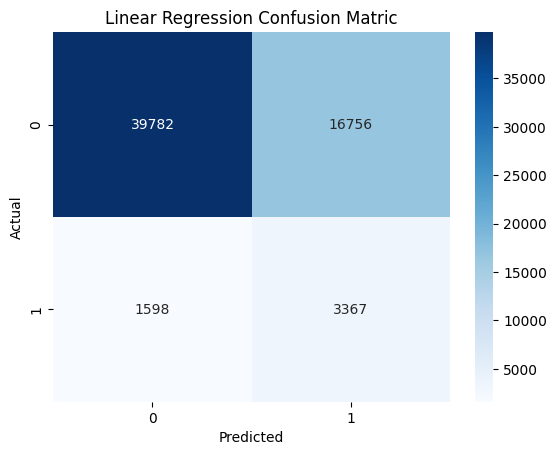

In [468]:
sb.heatmap(confl, annot=True, fmt='d', cmap='Blues')
plt.title("Linear Regression Confusion Matric")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [269]:
clr_lo =  classification_report(y_test,logi_pred,output_dict=True)

In [270]:
clr_lo = pd.DataFrame(clr_lo).transpose()

In [271]:
clr_lo

,precision,recall,f1-score,support
0,0.961382,0.703633,0.812557,56538.000000
1,0.167321,0.678147,0.268415,4965.000000
accuracy,0.701576,0.701576,0.701576,0.701576
macro avg,0.564352,0.690890,0.540486,61503.000000
weighted avg,0.897280,0.701576,0.768630,61503.000000


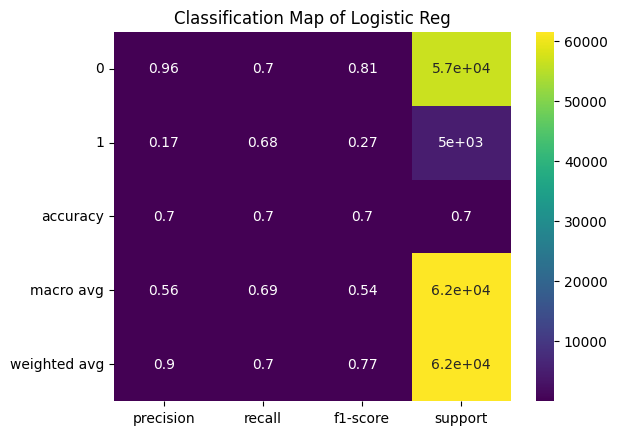

In [298]:
sb.heatmap(clr_lo, annot=True, cmap='viridis')
plt.title("Classification Map of Logistic Reg")
plt.show()

In [273]:
from sklearn.model_selection import GridSearchCV

In [274]:
param_grid = {'model__C' : [0.1,1,10,100] , 'model__gamma': [0.001, 0.01, 0.1, 1]}

In [275]:
grid_log = GridSearchCV (estimator = Logipipe, param_grid = param_grid, cv =5)

In [276]:
## GridSearchCV results shows at C = 1.0 the model performs comparitively and uses l2 regularizer
grid_log

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'model__C': [0.1, 1, ...], 'model__gamma': [0.001, 0.01, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [277]:
proba = pipe.predict_proba(x_baltrain)

In [278]:
proba.shape

(452296, 2)

In [279]:
x_baltrain.iloc[:,1].shape

(452296,)

In [280]:
proba[:,1].shape 

(452296,)

Text(0, 0.5, 'Probability')

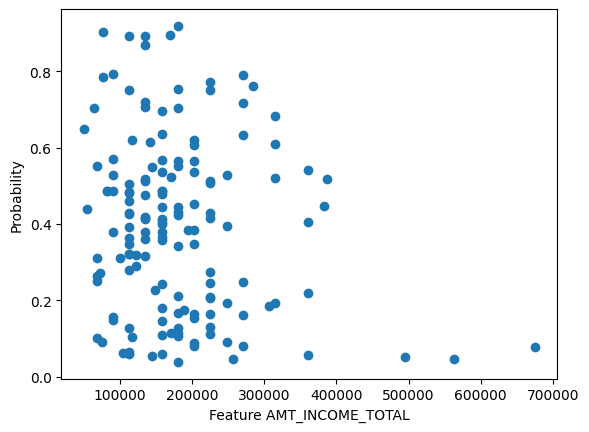

In [281]:
plt.scatter(x_baltrain.iloc[:150,3] ,proba[:150,1])
plt.xlabel(f"Feature {x_baltrain.columns[3]}")
plt.ylabel("Probability")

In [282]:
x_baltrain.columns[:10]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED'],
      dtype='object')

In [286]:
from sklearn.svm import SVC, LinearSVC

In [287]:
pipesvm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearSVC())])

In [288]:
svmpip = pipesvm.fit(x_baltrain, y_baltrain)

In [289]:
svmscore = pipesvm.score(x_baltrain, y_baltrain)

In [290]:
svmscore

0.7104352017263031

In [291]:
pipesvm.score(x_train, y_train)

0.6983146889532048

In [292]:
svm_pre = pipesvm.predict(x_test)

In [293]:
svmconf =  confusion_matrix(y_test, svm_pre)

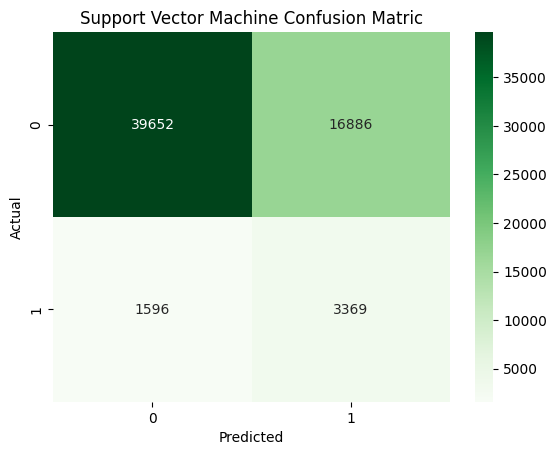

In [299]:
sb.heatmap(svmconf,fmt = "d", annot= True, cmap="Greens")
plt.title("Support Vector Machine Confusion Matric")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [301]:
svmcrep =  classification_report(y_test, svm_pre,output_dict = True)

In [305]:
svmmap = pd.DataFrame(svmcrep).transpose()

In [306]:
##Similar to Logistic Reg ,The recall value is reasonably high, indicating a low false-negative rate. This means most risk-causing customers are correctly identified and are not misclassified as non-risk.

svmmap

,precision,recall,f1-score,support
0,0.961307,0.701334,0.810995,56538.000000
1,0.166329,0.678550,0.267169,4965.000000
accuracy,0.699494,0.699494,0.699494,0.699494
macro avg,0.563818,0.689942,0.539082,61503.000000
weighted avg,0.897130,0.699494,0.767094,61503.000000


In [308]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [310]:
decmod =  DecisionTreeClassifier(max_depth = 10, random_state = 42)

In [313]:
from sklearn.tree import plot_tree

In [314]:
decmodel = decmod.fit(x_train, y_train)

In [319]:
decscore = decmod.score(x_train, y_train)

In [320]:
## The Decision Tree Accuaracy Score is high and 
## Learns by conditions well as Decision tree has a problem of Overfitting Prediction is aso comparitively equal
decscore

0.9231244512373581

In [322]:
decpred = decmod.score(x_test, y_test)

In [323]:
decpred

0.9170121782677267

In [324]:
dectest = decmod.predict(x_test)

In [325]:
## Accuaracy Score is comparitively high
np.mean(dectest==y_test)

np.float64(0.9170121782677267)

In [334]:
Feat_import = np.argsort(decmod.feature_importances_)

In [337]:
hj = Feat_import.reshape(1,-1)

In [342]:
hj.shape

(1, 193)

In [345]:
dec = hj[::-1]

In [363]:
top_feature = dec[:,:10]

In [366]:
Feature_impk = []
for i in top_feature:
     a = x_train.columns[i]
     Feature_impk.append(a)

In [367]:
Feature_impk

[Index(['FLAG_MOBIL', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_EMAIL',
        'FLAG_CONT_MOBILE', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_18',
        'EXT_SOURCE_2_missing', 'EXT_SOURCE_3_missing', 'OWN_CAR_AGE_missing',
        'FLAG_DOCUMENT_6'],
       dtype='object')]

In [370]:
decmat =  confusion_matrix(y_test, dectest)

In [372]:
decmat

array([[56306,   232],
       [ 4872,    93]])

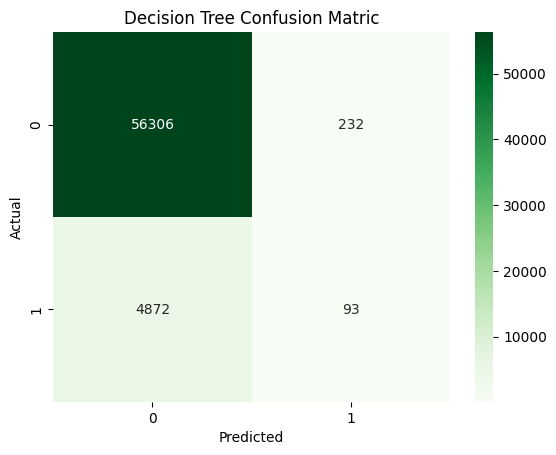

In [371]:
## Actual risk Persons are considered as Non risky this is bad for Home Loan
sb.heatmap(decmat,fmt = "d", annot= True, cmap="Greens")
plt.title("Decision Tree Confusion Matric")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [373]:
decrep =  classification_report(y_test,dectest ,output_dict = True)

In [377]:
decframe = pd.DataFrame(decrep).transpose()

In [378]:
## Recall and Precision and Recall Values are Low for 
## Risk causing Customers where FP and FN are high hence less risk persons can be considered more as Risk and  
## risk persons can fall as non risk which is dangerous.  
decframe

,precision,recall,f1-score,support
0,0.920364,0.995897,0.956641,56538.000000
1,0.286154,0.018731,0.035161,4965.000000
accuracy,0.917012,0.917012,0.917012,0.917012
macro avg,0.603259,0.507314,0.495901,61503.000000
weighted avg,0.869165,0.917012,0.882252,61503.000000


In [379]:
randmod = RandomForestClassifier(n_estimators = 100, max_depth = 6 , random_state = 42,class_weight= "balanced", max_features ="sqrt")

In [380]:
randmod.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [381]:
randscore = randmod.score(x_train, y_train)

In [382]:
randscore

0.6817867711619134

In [387]:
randpred = randmod.predict(x_test)

In [386]:
randpredsco = randmod.score(x_test, y_test)

In [388]:
randpredsco

0.6817228427881566

In [389]:
randmat =  confusion_matrix(y_test,randpred )

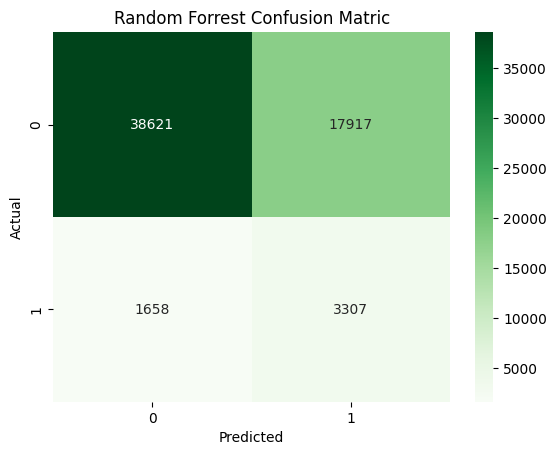

In [390]:
sb.heatmap(randmat,fmt = "d", annot= True, cmap="Greens")
plt.title("Random Forrest Confusion Matric")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [394]:
randrep =  pd.DataFrame(classification_report(y_test,dectest ,output_dict = True)).transpose()

In [395]:
randrep

,precision,recall,f1-score,support
0,0.920364,0.995897,0.956641,56538.000000
1,0.286154,0.018731,0.035161,4965.000000
accuracy,0.917012,0.917012,0.917012,0.917012
macro avg,0.603259,0.507314,0.495901,61503.000000
weighted avg,0.869165,0.917012,0.882252,61503.000000


In [539]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

In [474]:
len(x_test)

61503

In [460]:
prlo = pipe.predict_proba(x_test)


In [461]:
prlo.shape

(61503, 2)

In [472]:
scaler = StandardScaler() 

In [496]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(x_baltrain),columns=x_baltrain.columns)

In [497]:
X_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [498]:
Logistd1.fit(X_train_scaled, y_baltrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [410]:
len((y_test==0).astype(np.int64))

61503

In [500]:
y_prob = Logistd1.predict_proba(X_test_scaled)

In [545]:
y_probra = randmod.predict_proba(x_test)

In [501]:
y_prob.shape

(61503, 2)

In [502]:
fpr, tpr, thresholds = roc_curve((y_test==0).astype(np.int64), y_prob[:,0])

In [503]:
fprc, tprc, thresholdsc = roc_curve((y_test==1).astype(np.int64),  y_prob[:,1])

In [505]:
roc_auc = roc_auc_score((y_test==0).astype(np.int64), y_prob[:,0])

In [504]:
roc_aucc = roc_auc_score((y_test==1).astype(np.int64), y_prob[:,1])

In [435]:
(y_test==0).astype(np.int64).sum()

np.int64(56538)

In [437]:
(y_test==1).astype(np.int64).sum()

np.int64(4965)

In [528]:
roc_auc , roc_aucc

(0.759035203337295, 0.7590352033372951)

In [ ]:
precision, recall, threshold = precision_recall_curve((y_test==1).astype(np.int64), y_prob[:,1])

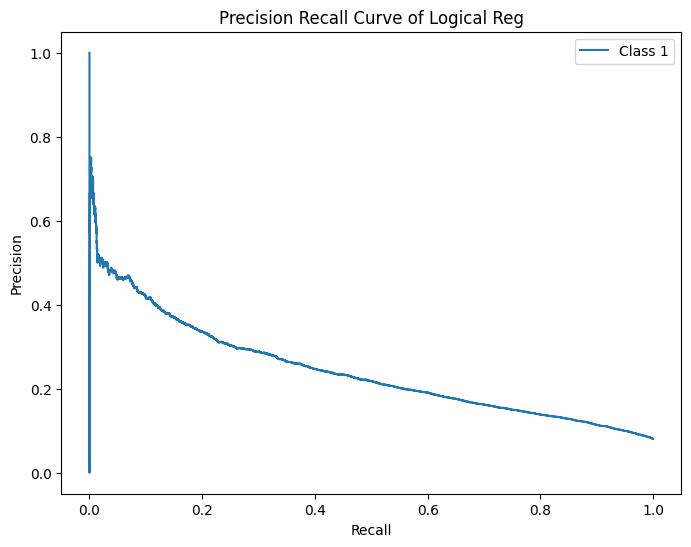

In [559]:

plt.figure(figsize=(8,6))
plt.plot(recall,precision,label=f"Class 1")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of Logical Reg")
plt.legend()
plt.show()

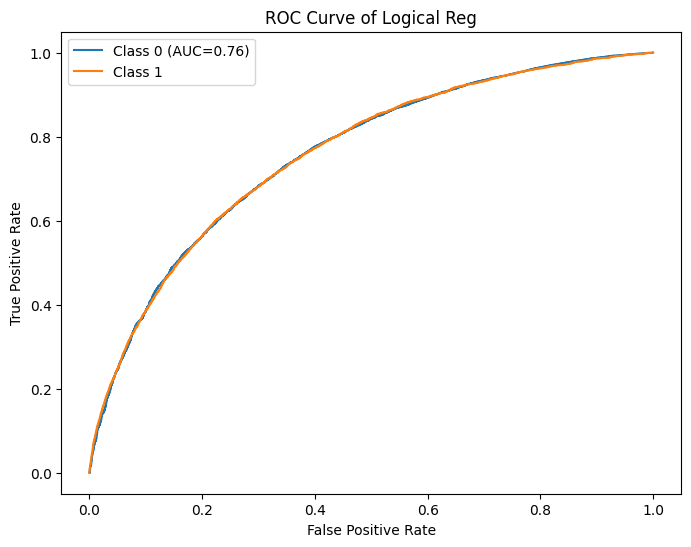

In [560]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Class 0 (AUC={roc_auc:.2f})")
plt.plot(fprc, tprc, label=f"Class 1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Logical Reg")
plt.legend()
plt.show()


In [546]:
precisionra, recallra, thresholdra = precision_recall_curve((y_test==1).astype(np.int64), y_probra[:,1])


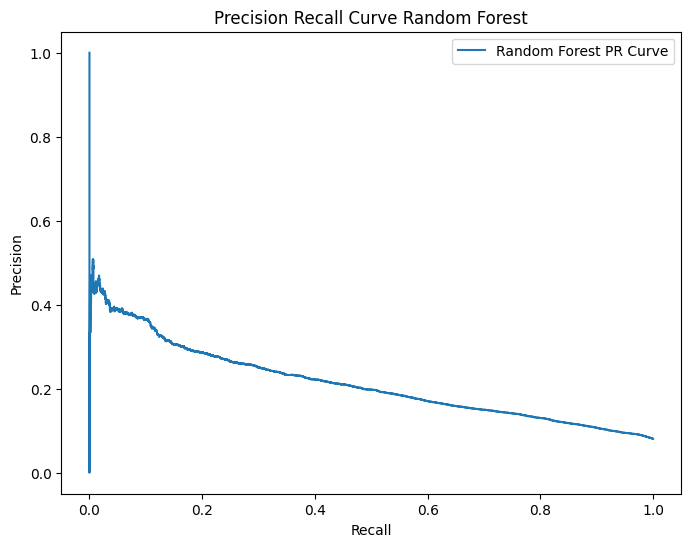

In [558]:
##When the threshold decreases, false positives (FP) increase, meaning
##more non-risk people are wrongly predicted as risk, and precision drops immediately

##Recall increases normally because as the threshold decreases, more actual risk cases are predicted as positive, 
## increasing true positives across the full threshold range.
plt.figure(figsize=(8,6))
plt.plot(recallra,precisionra, label=f"Random Forest PR Curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve Random Forest")
plt.legend()
plt.show()

In [548]:
fprand, tprand, thresholds = roc_curve((y_test==1).astype(np.int64), y_probra[:,1])

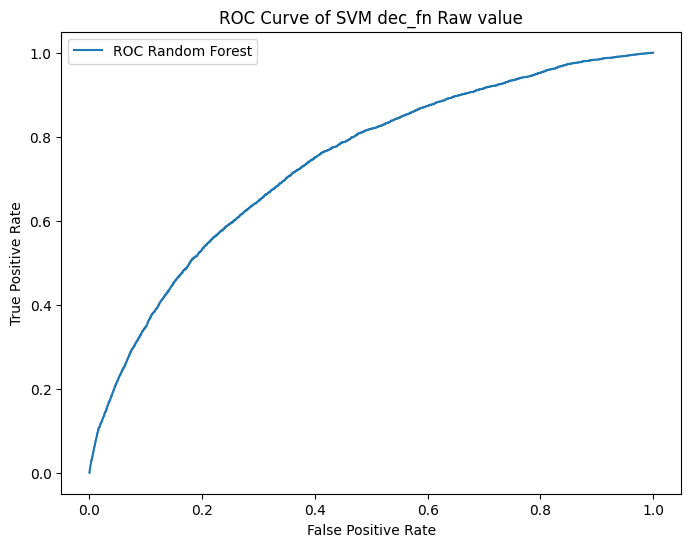

In [550]:
##Uses rates (TPR, FPR)
##Not sensitive to class imbalance
##So it looks smooth and optimistic
## ROC dont mind class Imbalnce hence it is smooth, model is non diagonal hence it is non random 
## but learns on high risk makes non risk into risk
plt.figure(figsize=(8,6))
plt.plot(fprand, tprand, label=f"ROC Random Forest")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of SVM dec_fn Raw value")
plt.legend()
plt.show()


In [508]:
svmraw = pipesvm.decision_function(x_test)

In [509]:
svmraw.shape

(61503,)

In [552]:
precisionsvm, recallsvm, thresholdsvm = precision_recall_curve((y_test==1).astype(np.int64), svmraw)

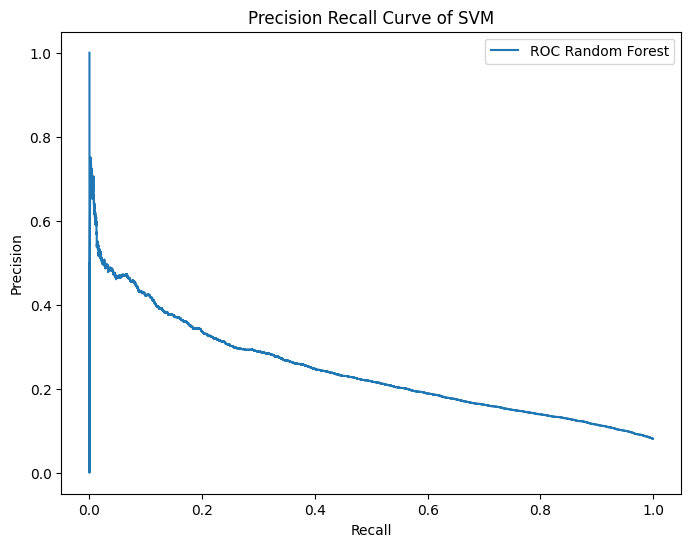

In [557]:
plt.figure(figsize=(8,6))
plt.plot(recallsvm ,precisionsvm, label=f"ROC Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of SVM")
plt.legend()
plt.show()

In [516]:
fprsv, tprsv, _ = roc_curve(y_test, svmraw)

In [517]:
roc_aucsv = roc_auc_score(y_test, svmraw)

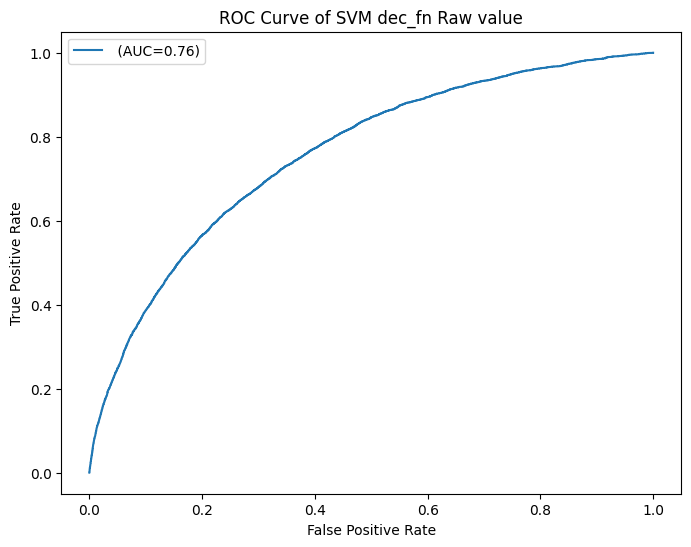

In [551]:
plt.figure(figsize=(8,6))
plt.plot(fprsv, tprsv, label=f" (AUC={roc_aucsv:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of SVM dec_fn Raw value")
plt.legend()
plt.show()


In [522]:
print(
    roc_auc_score(y_test, y_prob[:,1]),
    roc_auc_score(y_test, y_prob[:,0]),
    roc_auc_score(y_test, svmraw))


0.7590352033372951 0.24096479666270496 0.7587941584226947


In [540]:
average_precision_score(y_test, y_prob[:,1])

0.24254945378453305

In [ ]:
## This project compares multiple classification models for bank risk prediction on an imbalanced dataset.Logistic Regression serves as a baseline model and remains interpretable, 
## but shows limited recall for risk customers at conservative thresholds.Support Vector Machine (SVM), evaluated using the decision function, demonstrates stronger class separation in ROC analysis, 
## though precision degrades as the threshold is lowered due to rising false positives.
## Random Forest captures non-linear relationships and improves recall, but significantly increases false positives, which is evident from the steep drop in the Precision-Recall curve.
## SMOTE was applied to address class imbalance; however, it provided limited improvement in Precision-Recall performance, indicating that synthetic oversampling does not fully solve the false-positive problem in real banking risk data.
## Overall comparison shows that while ROC curves suggest acceptable discrimination across models, Precision-Recall analysis and threshold tuning are more reliable for model selection in imbalanced, cost-sensitive banking applications.
      